In [1]:
cd /data/a/cpac/isultan/projects/halomassloss/core_catalog_mevolved

/data/a/cpac/isultan/projects/halomassloss/core_catalog_mevolved


In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib
import subhalo_mass_loss_model_ALCC as SHMLM_HM
import subhalo_mass_loss_model_LJDS as SHMLM_SV
import subhalo_mass_loss_model as SHMLM_AQ
import genericio as gio
# from tqdm import tqdm
from itk import hist, h5_read_dict, gio_read_dict, loadpickle, plt_latex, periodic_bcs, many_to_one, reldif
# from cc_generate_fitting_dt_ALCC import m_evolved_col, A_arr, zeta_arr
from scipy import spatial #KD Tree for subhalo-core matching
# from scipy.stats import norm # Gaussian fitting
import itertools as it
# massbinsize = 0.5

In [3]:
assert SHMLM_HM.PARTICLES100MASS/100. * 2000 < 10**12
assert SHMLM_SV.PARTICLES100MASS/100. * 70 < 10**12

In [4]:
PARTICLEMASS = {'HM':SHMLM_HM.PARTICLES100MASS/100., 'SV':SHMLM_SV.PARTICLES100MASS/100., 'AQ':SHMLM_AQ.PARTICLES100MASS/100.}
OBJECTMASSCUT = {'HM':SHMLM_HM.PARTICLES100MASS, 'SV':SHMLM_SV.PARTICLES100MASS, 'AQ':SHMLM_AQ.PARTICLES100MASS}
SUBHALOMINMASS = { 'HM':20.*SHMLM_HM.PARTICLES100MASS/100., 'SV':20.*SHMLM_SV.PARTICLES100MASS/100. }
SUBHALOMINCOUNT = { 'HM':20, 'SV':20 }

In [83]:
execfile('paper2plotscripts.py')

In [6]:
(cc_HM0, sh_HM0, centrals_mask_HM0), (cc_SV0, sh_SV0, centrals_mask_SV0),(cc_AQ0, sh_AQ0, centrals_mask_AQ0) = load_data(499)
(cc_HM1, sh_HM1, centrals_mask_HM1), (cc_SV1, sh_SV1, centrals_mask_SV1),(cc_AQ1, sh_AQ1, centrals_mask_AQ1) = load_data(247)

99.9999972959
99.99999751


In [7]:
plt.style.use(['science', 'high-vis'])

# z=0

NameError: name 'cc_HM' is not defined

/home/isultan/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


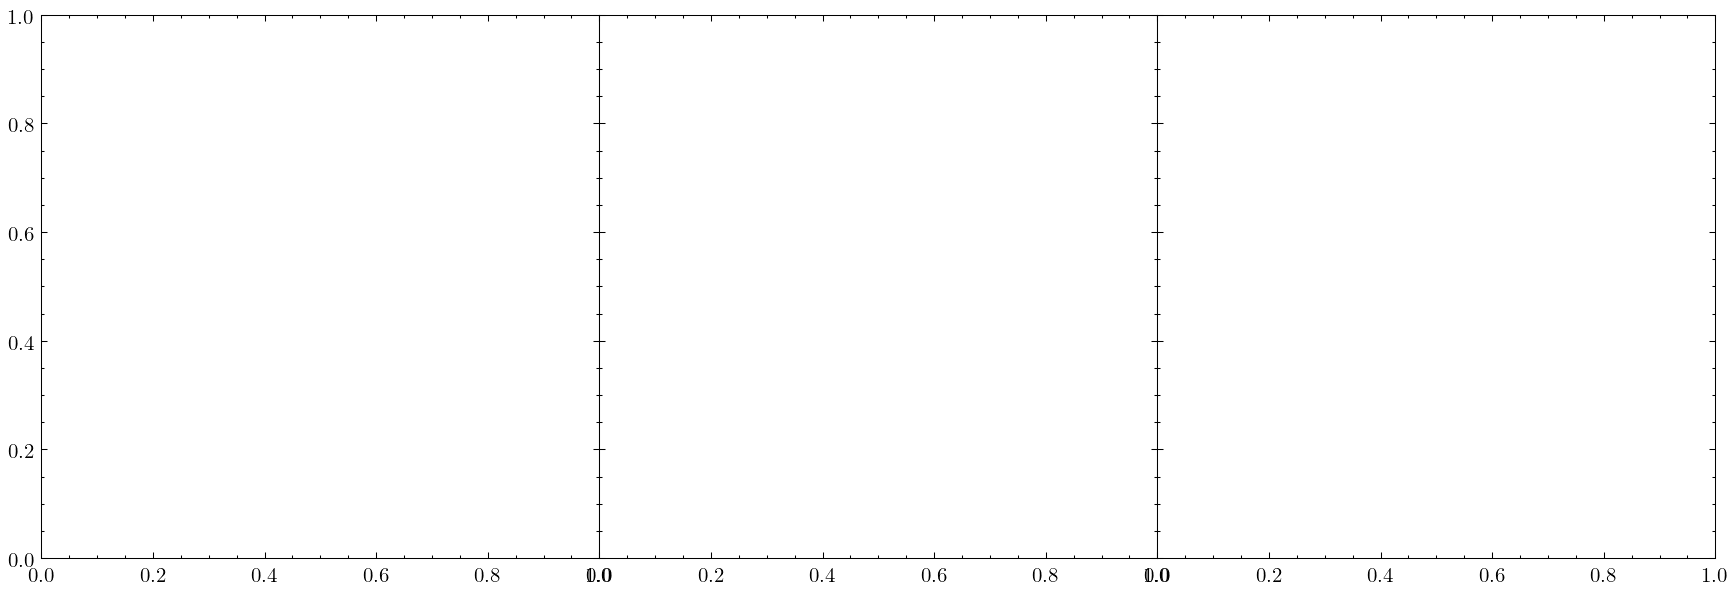

In [15]:
r = (-4,0)
bins = 40
alpha = .8

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=[4.8*3,4.8*1], dpi=150)
for M1, ax in zip((12, 13, 14), (ax1, ax2, ax3)):
    M1, M2 = 10**M1, 10**(M1+0.5)

    for cc, sh, centrals_mask, label in zip([cc_HM, cc_SV], [sh_HM, sh_SV], [centrals_mask_HM, centrals_mask_SV], ['HM', 'SV']):
        bin_mask = (~centrals_mask)&(M1 <= cc['M'])&(cc['M'] <= M2)
        nH = np.sum( ((M1 <= cc['M'])&(cc['M'] <= M2))[centrals_mask] )
        print nH
        parr = cc['m_evolved_0.9_0.001'][bin_mask] / cc['M'][bin_mask]

        x, y, yerr, yerr_log = hist(np.log10(parr), bins=bins, normed=True, plotFlag=False, range=r, normScalar=nH, normBinsize=True, normLogCnts=True, retEbars=True)
        ax.errorbar(x, y, yerr=yerr_log, label='cores '+label, marker='o', ls='', mec='k', alpha=alpha, mew=0.5, ms=20**0.5, capsize=4, elinewidth=1.5 )

        bin_mask_sh = (sh['subhalo_tag']!=0)&(M1 <= sh['M'])&(sh['M'] <= M2)
        nH_sh = len(np.unique( sh['fof_halo_tag'][(M1 <= sh['M'])&(sh['M'] <= M2)] ))
        print nH_sh
        print ''

        parr_sh = sh['subhalo_mass'][bin_mask_sh] / sh['M'][bin_mask_sh]
        x, y, yerr, yerr_log = hist(np.log10(parr_sh), bins=bins, normed=True, plotFlag=False, range=r, normScalar=nH_sh, normBinsize=True, normLogCnts=True, retEbars=True)
        ax.errorbar(x, y, yerr=yerr_log, label='sh '+label, marker='o', ls='', mec='k', alpha=alpha, mew=0.5, ms=20**0.5, capsize=4, elinewidth=1.5 )
    ax3.legend()

HM 39505
HM 39505



/home/isultan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: invalid value encountered in subtract
/home/isultan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in true_divide


SV 40628
SV 40628



/home/isultan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:102: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


HM 4738
HM 4738

SV 4797
SV 4797

HM 348
HM 348

SV 337
SV 337



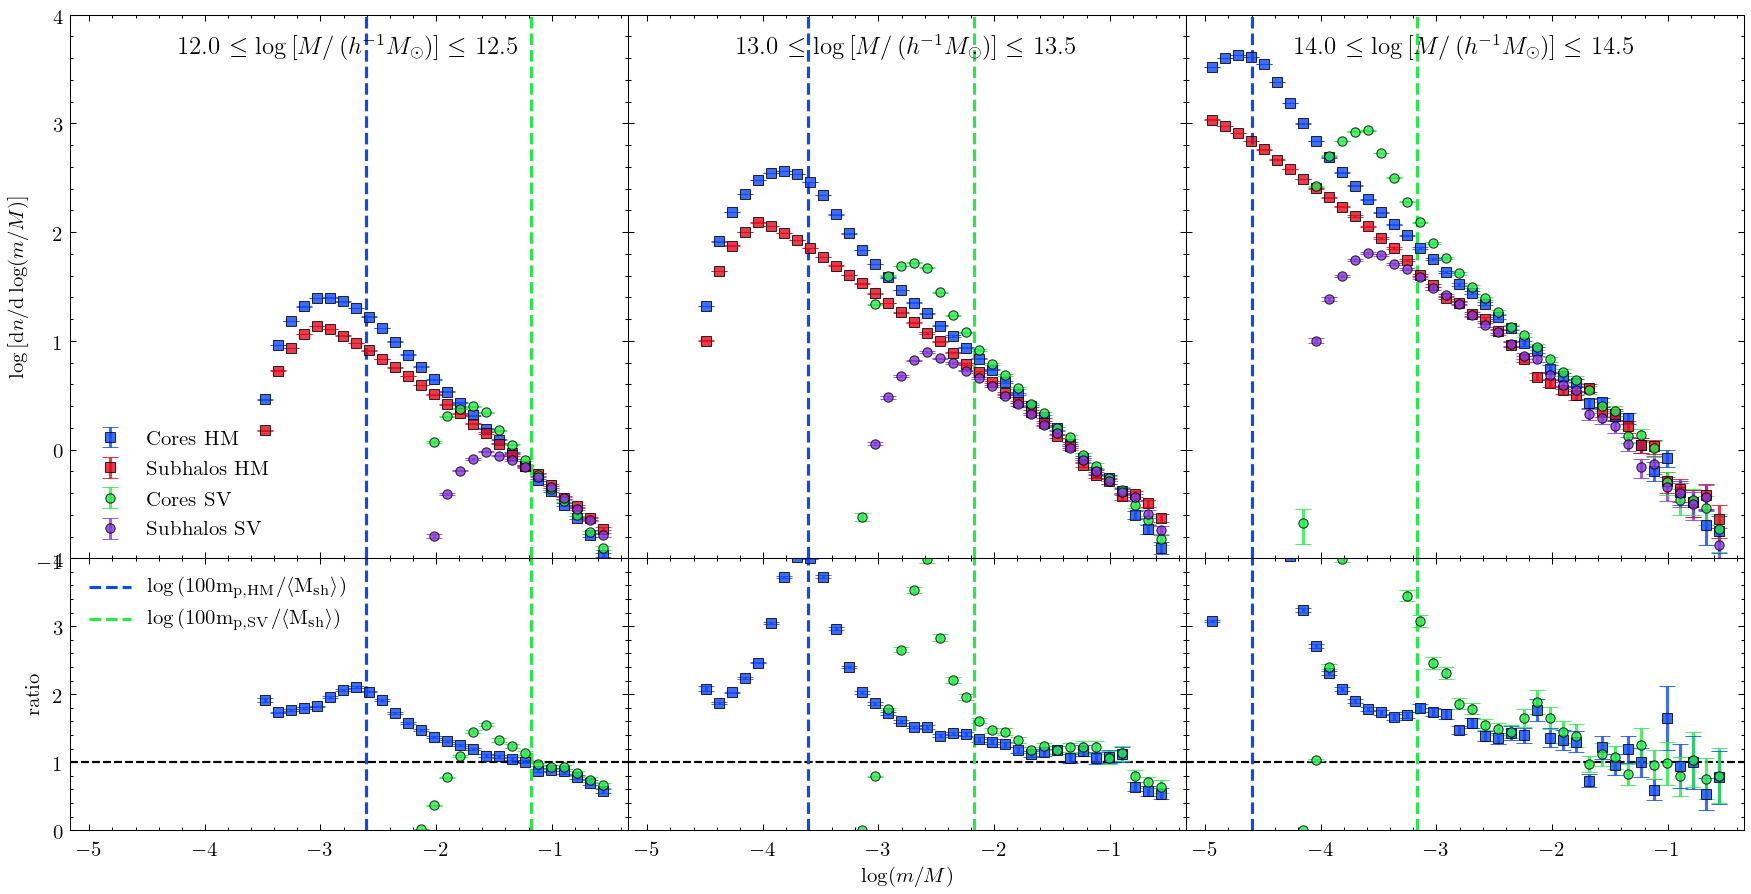

In [80]:
resolution_tests(cc_HM0, sh_HM0, centrals_mask_HM0, cc_SV0, sh_SV0, centrals_mask_SV0)
# plt.savefig('Paper2Figs/resolution_test_z0_mcut_vl.pdf')

SV 40628
SV 40628

AlphaQ 37182
AlphaQ 37181



/home/isultan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:29: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/isultan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in subtract


SV 4797
SV 4797

AlphaQ 4335
AlphaQ 4335

SV 337
SV 337

AlphaQ 286
AlphaQ 286



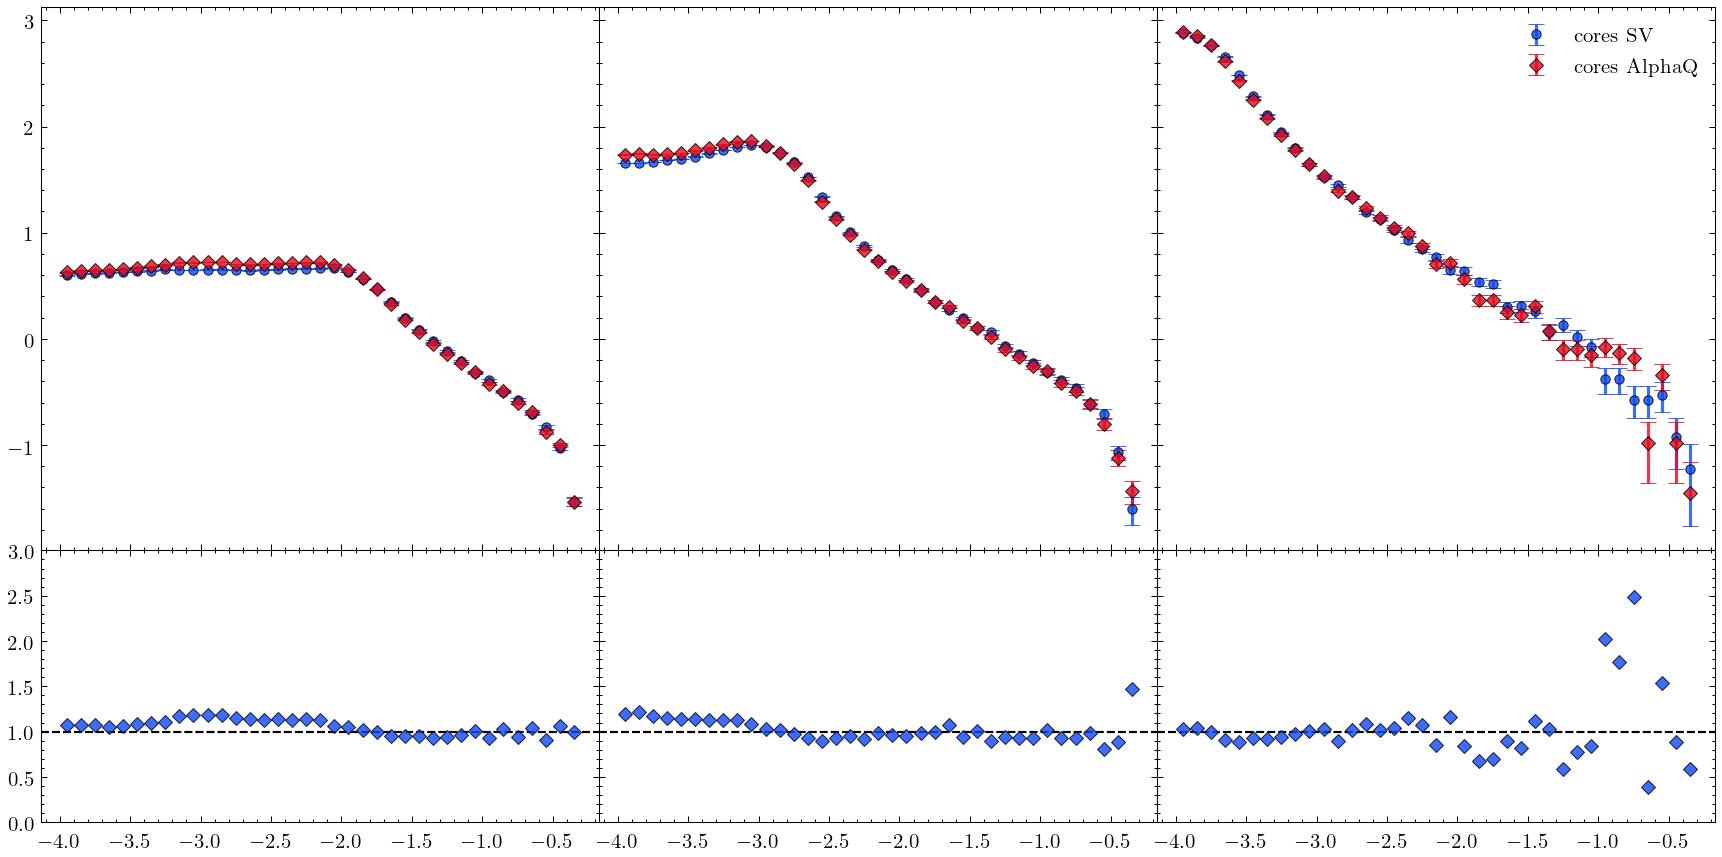

In [25]:
r = (-4,0)
bins = 40
alpha = .8

fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='all', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0, 'height_ratios': [2, 1]}, figsize=[4.8*3,4.8*1.5], dpi=150)
for logM1, ax, axr in zip((12, 13, 14), (ax1, ax2, ax3), (ax4, ax5, ax6)):
    yfid = 'SV'
    M1, M2 = 10**logM1, 10**(logM1+0.5)

    for cc, sh, centrals_mask, label, marker in zip([cc_SV, cc_AQ], [sh_SV, sh_AQ], [centrals_mask_SV, centrals_mask_AQ], ['SV', 'AlphaQ'], ['o', 'D']):
        bin_mask = (~centrals_mask)&(M1 <= cc['M'])&(cc['M'] <= M2)
        
        fht_fof = (cc['fof_halo_tag']<0)*np.bitwise_and(cc['fof_halo_tag']*-1, 0xffffffffffff) + (cc['fof_halo_tag']>=0)*cc['fof_halo_tag']
        nH_cores = len(np.unique( fht_fof[centrals_mask&(M1 <= cc['M'])&(cc['M'] <= M2)] ))
        print label, nH_cores
        parr = cc['m_evolved_0.9_0.001'][bin_mask] / cc['M'][bin_mask]

        x, y, yerr, yerr_log = hist(np.log10(parr), bins=bins, normed=True, plotFlag=False, range=r, normScalar=nH_cores, normBinsize=True, normLogCnts=True, retEbars=True)
        ax.errorbar(x, y, yerr=yerr_log, label='cores '+label, marker=marker, ls='', mec='k', alpha=alpha, mew=0.5, ms=20**0.5, capsize=4, elinewidth=1.5 )

        bin_mask_sh = (sh['subhalo_tag']!=0)&(M1 <= sh['M'])&(sh['M'] <= M2)
        nH_sh = len(np.unique( sh['fof_halo_tag'][(M1 <= sh['M'])&(sh['M'] <= M2)] ))
        print label, nH_sh
        print ''
#         assert nH_cores == nH_sh

        parr_sh = sh['subhalo_mass'][bin_mask_sh] / sh['M'][bin_mask_sh]
        x_sh, y_sh, yerr_sh, yerr_log_sh = hist(np.log10(parr_sh), bins=bins, normed=True, plotFlag=False, range=r, normScalar=nH_sh, normBinsize=True, normLogCnts=True, retEbars=True)
        if yfid == label:
            yfid = y
#         ax.errorbar(x_sh, y_sh, yerr=yerr_log_sh, label='sh '+label, marker=marker, ls='', mec='k', alpha=alpha, mew=0.5, ms=20**0.5, capsize=4, elinewidth=1.5 )
        else:
            axr.errorbar(x, 10**(y-yfid), yerr=None, marker=marker, ls='', mec='k', alpha=alpha, mew=0.5, ms=20**0.5, capsize=4, elinewidth=1.5 )
        axr.axhline(1, c='k',ls='--', lw=1, zorder=-1)
        axr.set_ylim(0,3)
ax3.legend()
# plt.savefig('Paper2Figs/cosmology_test_z0.pdf')

SV 40628
SV 40628

AlphaQ 37182


/home/isultan/projects/itk/itk.py:79: RuntimeWarning: invalid value encountered in true_divide
  eb_lower = np.log10(np.true_divide(cnts, cnts-np.sqrt(cnts)))
/home/isultan/projects/itk/itk.py:80: RuntimeWarning: invalid value encountered in true_divide
  eb_upper = -np.log10(np.true_divide(cnts, cnts+np.sqrt(cnts)))
/home/isultan/projects/itk/itk.py:92: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)


AlphaQ 37181

(0.852071665120543, 1.2060802330504576)
SV 4797
SV 4797



/home/isultan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:22: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/isultan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in subtract
/home/isultan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/isultan/projects/itk/itk.py:79: RuntimeWarning: divide by zero encountered in true_divide
  eb_lower = np.log10(np.true_divide(cnts, cnts-np.sqrt(cnts)))


AlphaQ 4335
AlphaQ 4335

(0.6607676183596917, 2.1044966770231435)
SV 337
SV 337

AlphaQ 286
AlphaQ 286

(-0.2565090428766156, 2.473650630237177)


/home/isultan/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


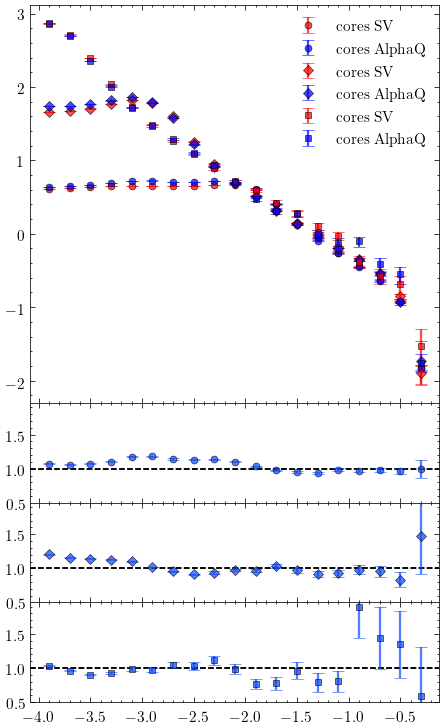

In [23]:
r = (-4,0)
bins = 20
alpha = .7

# fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='all', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0, 'height_ratios': [2, 1]}, figsize=[4.8*3,4.8*1.5], dpi=150)
# for logM1, ax, axr in zip((12, 13, 14), (ax1, ax2, ax3), (ax4, ax5, ax6)):
fig, (ax, ax1, ax2, ax3) = plt.subplots(4, sharex='all', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0, 'height_ratios': [4, 1, 1, 1]}, figsize=[4.8*1,4.8*7/4], dpi=110)
for logM1, axr, marker in zip((12, 13, 14), (ax1,ax2,ax3), ('o', 'D', 's')):
    yfid = 'SV'
    yerrfid = None
    M1, M2 = 10**logM1, 10**(logM1+0.5)

    for cc, sh, centrals_mask, label, markerc in zip([cc_SV, cc_AQ], [sh_SV, sh_AQ], [centrals_mask_SV, centrals_mask_AQ], ['SV', 'AlphaQ'], ['r', 'b']):
        x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r)
        errorbar(ax, x, y, yerr=yerr_log, label='cores '+label, marker=marker, alpha=alpha, c=markerc)
        
        x_sh, y_sh, yerr_sh, yerr_log_sh, nH_sh = subhalo_plot(sh, M1, M2, label, bins, r)
        
        print ''
#         assert nH_cores == nH_sh

        if yfid == label:
            yfid = y
            yerrfid = yerr
        else:
            errorbar(axr, x, 10**(y-yfid), yerr=nratioerr(10**y, yerr, 10**yfid, yerrfid), marker=marker, alpha=alpha)
        axr.axhline(1, c='k',ls='--', lw=1, zorder=-1)
    print axr.get_ylim()
    axr.set_ylim(0.5,1.96)
ax.legend()
# plt.savefig('Paper2Figs/cosmology_test_z0.pdf')

HM 39505
SV 40628
HM 4738
SV 4797
HM 348
SV 337


/home/isultan/projects/itk/itk.py:79: RuntimeWarning: divide by zero encountered in true_divide
  eb_lower = np.log10(np.true_divide(cnts, cnts-np.sqrt(cnts)))


Text(0,0.5,'ratio')

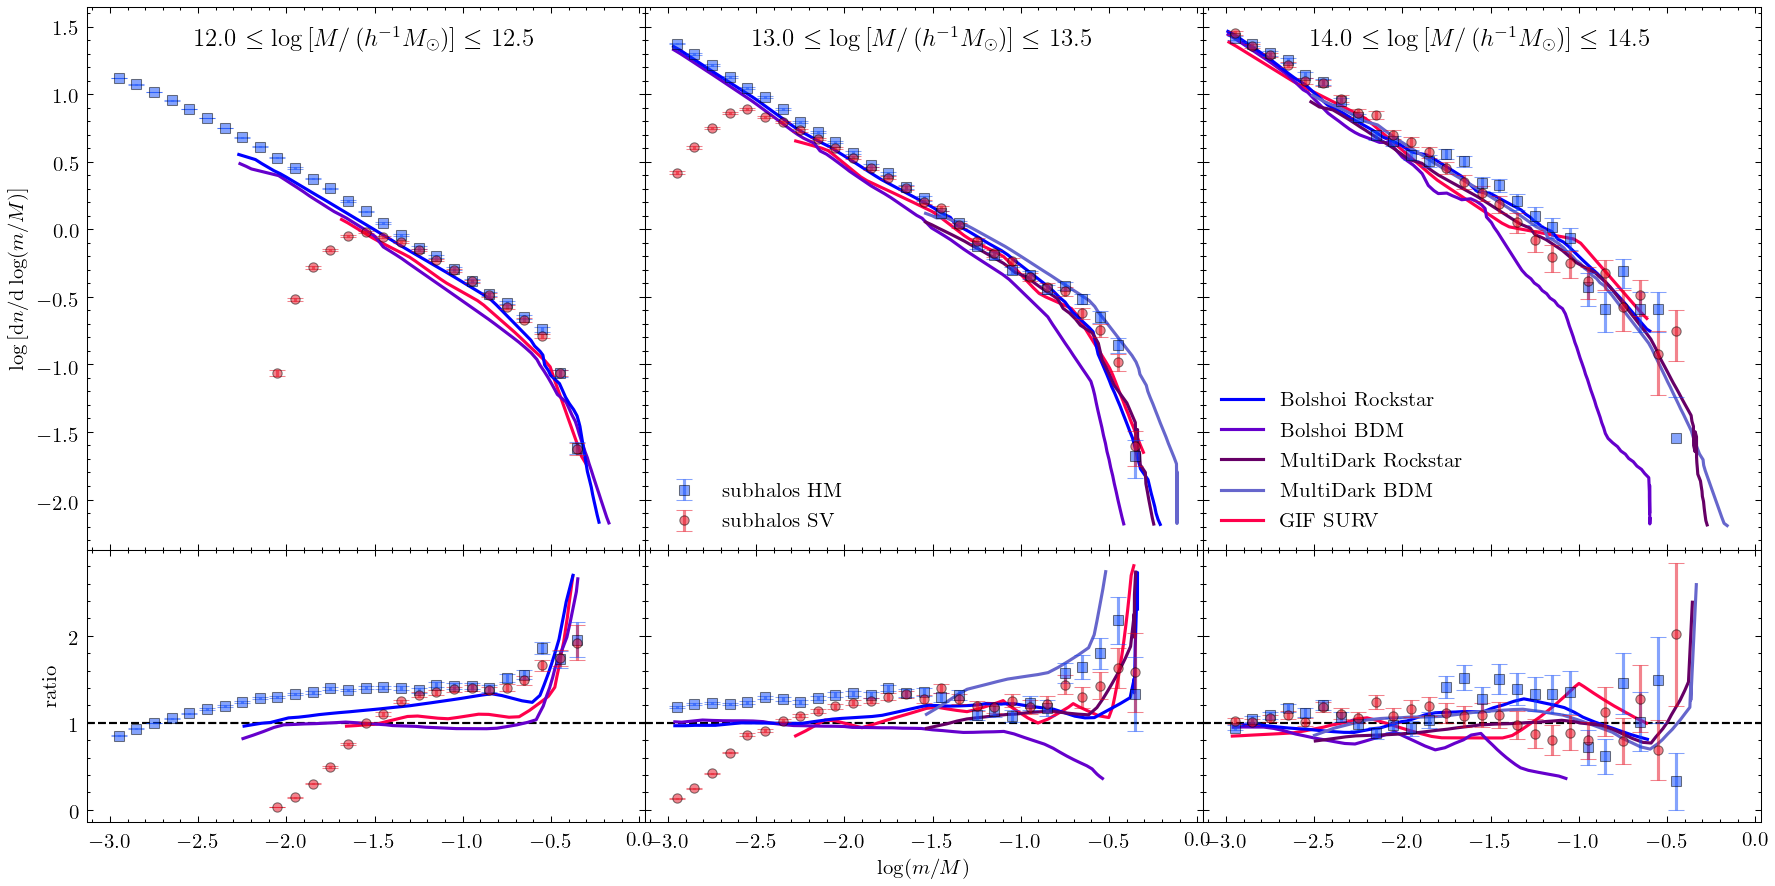

In [25]:
r = (-3,0)
bins = 30
alpha = .5

fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='all', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0, 'height_ratios': [2, 1]}, figsize=[4.8*3,4.8*1.5], dpi=150)
fig5_plot(None, ax3, legendFlag=True)
ax3.legend(loc=3)
for logM1, ax, axr in zip((12, 13, 14), (ax1, ax2, ax3), (ax4, ax5, ax6)):
    M1, M2 = 10**logM1, 10**(logM1+0.5)
    ax.set_title(r'{} $\le \log \left[ M / \left(h^{{-1}}M_\odot \right) \right] \le$ {}'.format(logM1+0.0, logM1+0.5), y=0.9)

    for sh, label, marker in zip([sh_HM0, sh_SV0], ['HM', 'SV'], ['s', 'o']):
        x, y, yerr, yerr_log, nH_sh = subhalo_plot(sh, M1, M2, label, bins, r, mlim=SUBHALOMINMASS[label])

        errorbar(ax, x, y, yerr=yerr_log, label='Subhalos '+label, marker=marker, alpha=alpha)
        errorbar(axr, x, 10**(y-fitting_model(x, logM1)), yerr=yerr/10**fitting_model(x, logM1), marker=marker, alpha=alpha, zerocut=True)
        
        axr.axhline(1, c='k',ls='--', lw='1', zorder=-2)
#         axr.set_ylim(10**(-0.4),10**0.4)
    if ax == ax2:
        ax.legend(loc=3)
    fig5_plot(logM1, ax)
    fig5_plot(logM1, axr, ratioFlag=True)
ax5.set_xlabel(r'$\log(m/M)$')
ax1.set_ylabel(r'$\log \left[ \mathrm{d}n/\mathrm{d} \log(m/M) \right]$')
ax4.set_ylabel(r'ratio')
# plt.savefig('Paper2Figs/subfinder_comparison_mcut.pdf')

# z=1

30462
33020

33812
34592

2078
2368

2246
2418

18
21

29
36



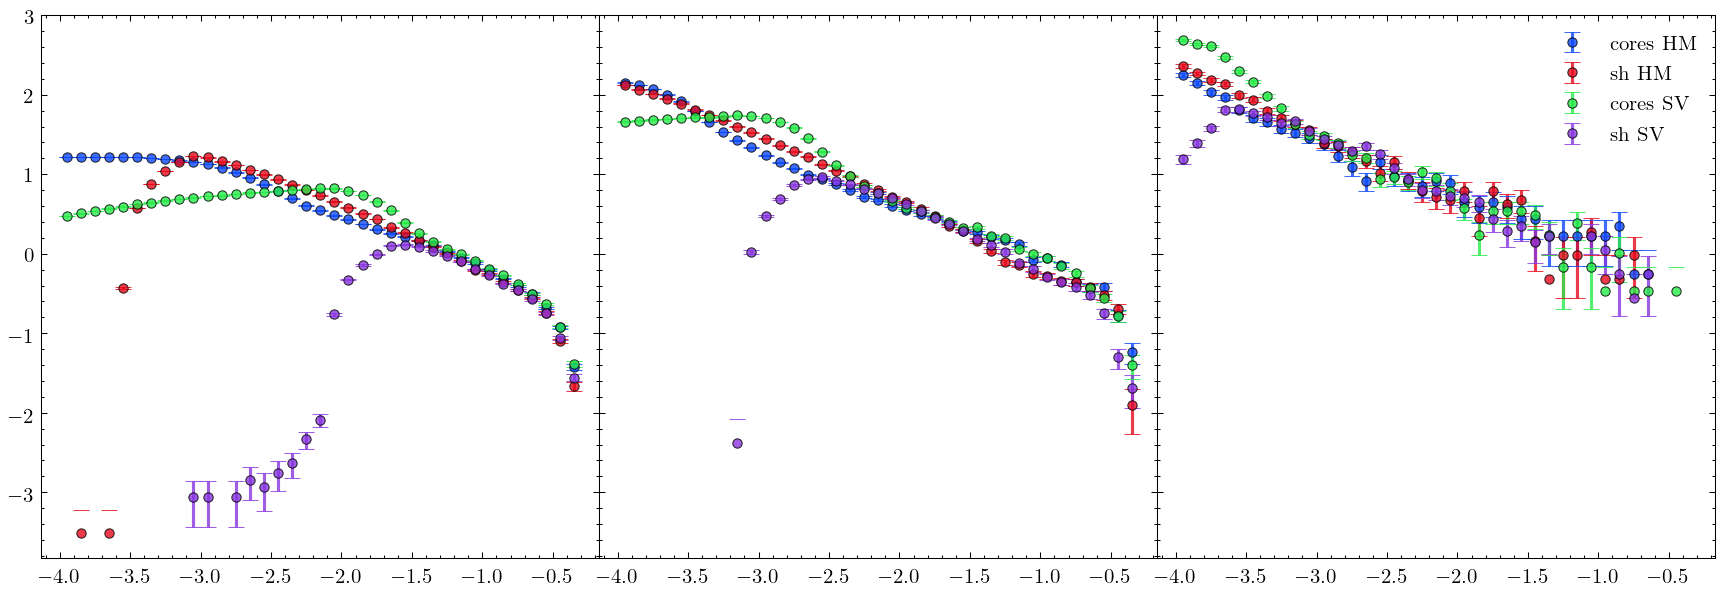

In [15]:
r = (-4,0)
bins = 40
alpha = .8

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=[4.8*3,4.8*1], dpi=150)
for M1, ax in zip((12, 13, 14), (ax1, ax2, ax3)):
    M1, M2 = 10**M1, 10**(M1+0.5)

    for cc, sh, centrals_mask, label in zip([cc_HM, cc_SV], [sh_HM, sh_SV], [centrals_mask_HM, centrals_mask_SV], ['HM', 'SV']):
        bin_mask = (~centrals_mask)&(M1 <= cc['M'])&(cc['M'] <= M2)
        nH = np.sum( ((M1 <= cc['M'])&(cc['M'] <= M2))[centrals_mask] )
        print nH
        parr = cc['m_evolved_0.9_0.001'][bin_mask] / cc['M'][bin_mask]

        x, y, yerr, yerr_log = hist(np.log10(parr), bins=bins, normed=True, plotFlag=False, range=r, normScalar=nH, normBinsize=True, normLogCnts=True, retEbars=True)
        ax.errorbar(x, y, yerr=yerr_log, label='cores '+label, marker='o', ls='', mec='k', alpha=alpha, mew=0.5, ms=20**0.5, capsize=4, elinewidth=1.5 )

        bin_mask_sh = (sh['subhalo_tag']!=0)&(M1 <= sh['M'])&(sh['M'] <= M2)
        nH_sh = len(np.unique( sh['fof_halo_tag'][(M1 <= sh['M'])&(sh['M'] <= M2)] ))
        print nH_sh
        print ''

        parr_sh = sh['subhalo_mass'][bin_mask_sh] / sh['M'][bin_mask_sh]
        x, y, yerr, yerr_log = hist(np.log10(parr_sh), bins=bins, normed=True, plotFlag=False, range=r, normScalar=nH_sh, normBinsize=True, normLogCnts=True, retEbars=True)
        ax.errorbar(x, y, yerr=yerr_log, label='sh '+label, marker='o', ls='', mec='k', alpha=alpha, mew=0.5, ms=20**0.5, capsize=4, elinewidth=1.5 )
    ax3.legend()

33020
33020

34592
34592

2368
2368

2418
2418

21
21

36
36



/home/isultan/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


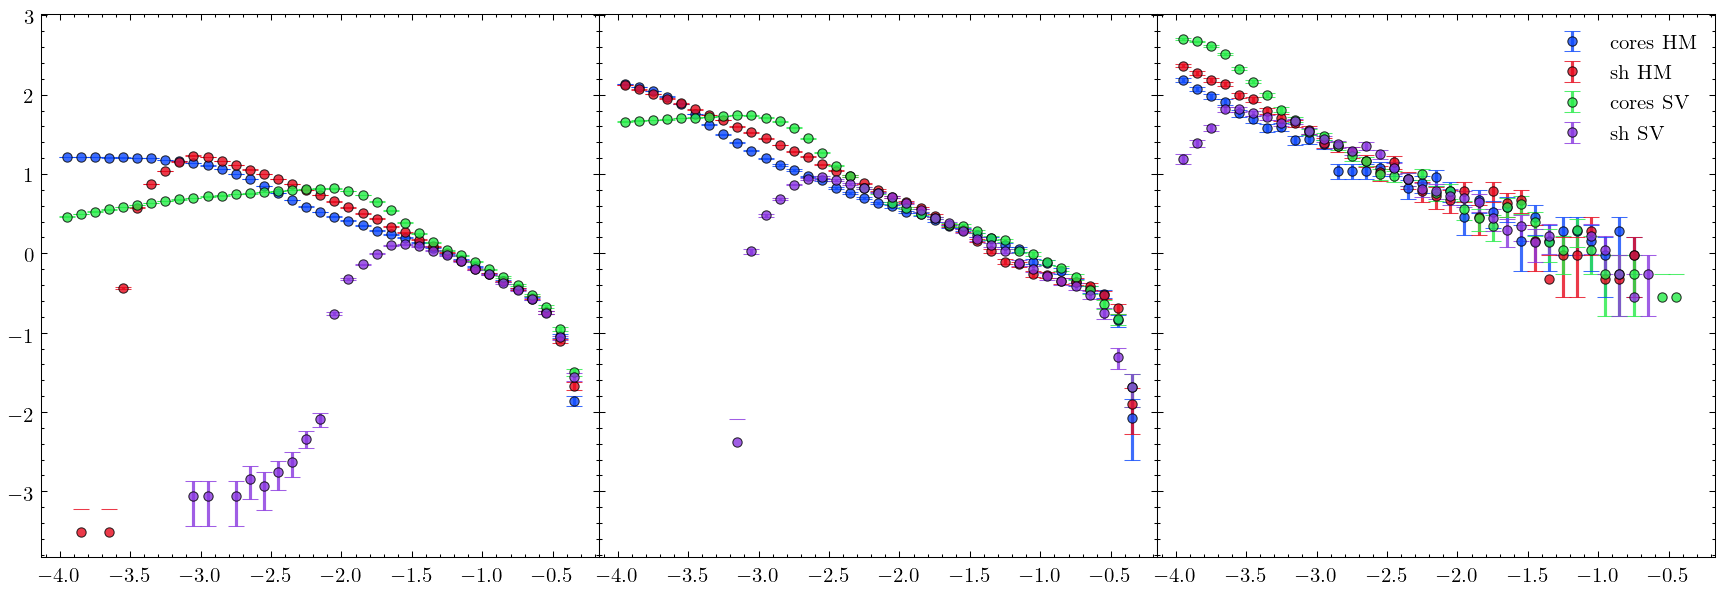

In [25]:
r = (-4,0)
bins = 40
alpha = .8

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=[4.8*3,4.8*1], dpi=150)
for M1, ax in zip((12, 13, 14), (ax1, ax2, ax3)):
    M1, M2 = 10**M1, 10**(M1+0.5)

    for cc, sh, centrals_mask, label in zip([cc_HM, cc_SV], [sh_HM, sh_SV], [centrals_mask_HM, centrals_mask_SV], ['HM', 'SV']):
        bin_mask = (~centrals_mask)&(M1 <= cc['M'])&(cc['M'] <= M2)
        
        fht_fof = (cc['fof_halo_tag']<0)*np.bitwise_and(cc['fof_halo_tag']*-1, 0xffffffffffff) + (cc['fof_halo_tag']>=0)*cc['fof_halo_tag']
        nH_cores = len(np.unique( fht_fof[centrals_mask&(M1 <= cc['M'])&(cc['M'] <= M2)] ))
        print nH_cores
        parr = cc['m_evolved_0.9_0.001'][bin_mask] / cc['M'][bin_mask]

        x, y, yerr, yerr_log = hist(np.log10(parr), bins=bins, normed=True, plotFlag=False, range=r, normScalar=nH_cores, normBinsize=True, normLogCnts=True, retEbars=True)
        ax.errorbar(x, y, yerr=yerr_log, label='cores '+label, marker='o', ls='', mec='k', alpha=alpha, mew=0.5, ms=20**0.5, capsize=4, elinewidth=1.5 )

        bin_mask_sh = (sh['subhalo_tag']!=0)&(M1 <= sh['M'])&(sh['M'] <= M2)
        nH_sh = len(np.unique( sh['fof_halo_tag'][(M1 <= sh['M'])&(sh['M'] <= M2)] ))
        print nH_sh
        print ''
        assert nH_cores == nH_sh

        parr_sh = sh['subhalo_mass'][bin_mask_sh] / sh['M'][bin_mask_sh]
        x, y, yerr, yerr_log = hist(np.log10(parr_sh), bins=bins, normed=True, plotFlag=False, range=r, normScalar=nH_sh, normBinsize=True, normLogCnts=True, retEbars=True)
        ax.errorbar(x, y, yerr=yerr_log, label='sh '+label, marker='o', ls='', mec='k', alpha=alpha, mew=0.5, ms=20**0.5, capsize=4, elinewidth=1.5 )
    ax3.legend()

HM 33020
HM 33020

SV 34592


/home/isultan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: invalid value encountered in subtract
/home/isultan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in true_divide
/home/isultan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:102: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


SV 34592

HM 2368
HM 2368

SV 2418
SV 2418

HM 21
HM 21

SV 36
SV 36



/home/isultan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in true_divide


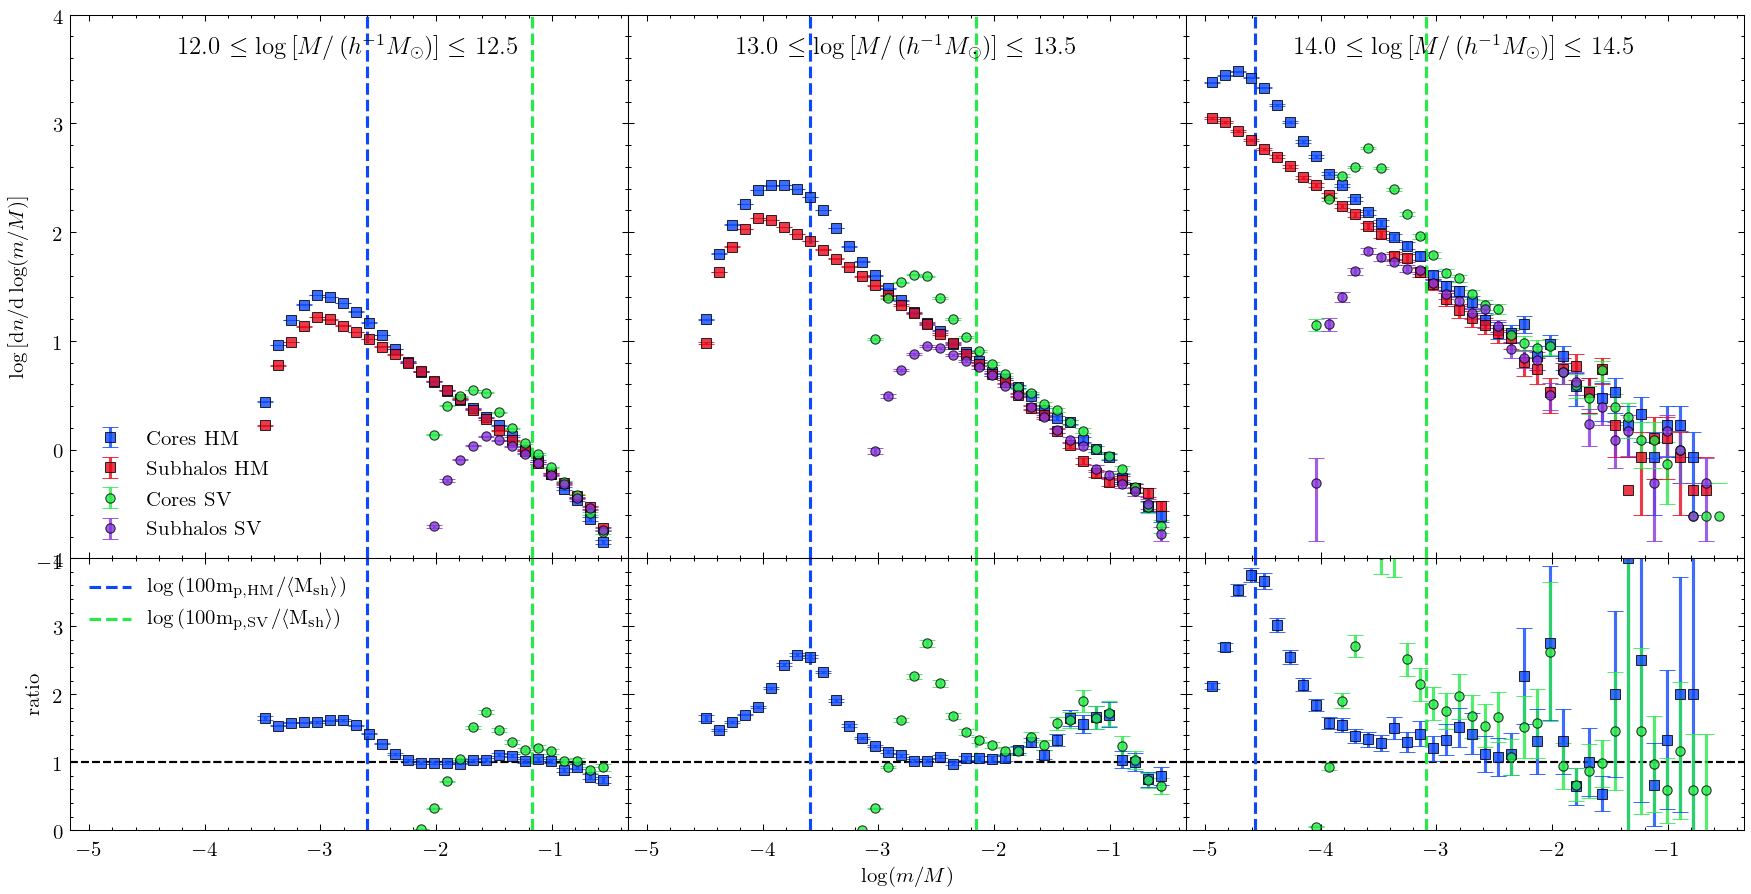

In [79]:
resolution_tests(cc_HM1, sh_HM1, centrals_mask_HM1, cc_SV1, sh_SV1, centrals_mask_SV1)
# plt.savefig('Paper2Figs/resolution_test_z1_mcut_vl.pdf')

# fig 5 comparison

In [21]:
fig5 = loadpickle("Notebooks/2016bfig5.p")

In [22]:
def fig5_plot(logM1, ax, ratioFlag=False, legendFlag=False, excludelabels=['HS Subfind', 'MSII Subfind']):
    colorsd = {'MSII Subfind':'#983334', 'HS Subfind':'#FF9833', 'GIF SURV':'#FF004B', 'Bolshoi BDM':'#6500CC', 'Bolshoi Rockstar':'#0000FF', 'MultiDark BDM':'#6666CC', 'MultiDark Rockstar':'#660066'}
    """Plot 2016B Figure 5 plot of M range [M1, M1+0.5]."""
    if legendFlag:
        for label, c in colorsd.items():
            if label in excludelabels:
                continue
            ax.plot([], [], '-', label=label, alpha=1., c=c)
        return
    for label, x, y, xlr, ylr in fig5[logM1]:
        if label in excludelabels:
            continue
        if ratioFlag:
            ax.plot(xlr, 10**ylr, '-', label=label, alpha=1., c=colorsd[label], zorder=-1)
#             ax.plot(x, 10**(y-fitting_model(x, logM1)), '--', label=label, alpha=1., c=colorsd[label])
        else:
            ax.plot(x, y, '-', label=label, alpha=1., c=colorsd[label], zorder=-1)

In [23]:
def fitting_model(log_m_over_M, logM1):
    Amd = {12:0.045, 13:0.058, 14:0.080}
    Am, alpha = Amd[logM1], 0.86
    psi = 10**log_m_over_M
    return np.log10( Am * psi**(-alpha) * np.exp(-50.*psi**4) )

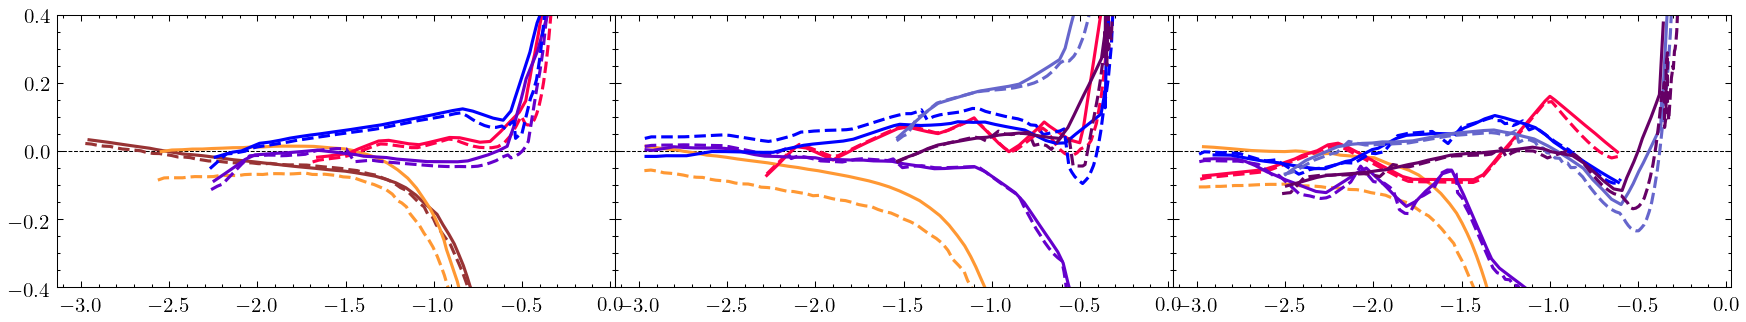

In [208]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=[4.8*3,4.8*.5], dpi=150)
fig5_plot(12, ax1, ratioFlag=True)
fig5_plot(13, ax2, ratioFlag=True)
fig5_plot(14, ax3, ratioFlag=True)
ax1.set_ylim(-0.4,.4)
ax1.axhline(0, ls='--', c='k', zorder=-1, lw=.5)
ax2.axhline(0, ls='--', c='k', zorder=-1, lw=.5)
ax3.axhline(0, ls='--', c='k', zorder=-1, lw=.5)

# Chi<sup>2</sup> fitting

In [31]:
A_arr = np.array([0.4, 0.5, 0.6 , 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4])
zeta_arr = np.array([0.001, 0.005, 0.01, 0.02, 0.04, 0.07, 0.08, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3])

In [32]:
bins = 20
alpha = .8
label = 'SV'

cc = cc_SV0
sh = sh_SV0
centrals_mask = centrals_mask_SV0

rdict = {12:(-1.3,-0.4), 13:(-1.9,-0.4), 14:(-2.8,-0.6), 'ALL':(-3.0, -0.4)}
# rdict = {12:(-0.6,-0.4), 13:(-1.9,-0.4), 14:(-2.8,-0.6), 'ALL':(-0.8,-0.5)}

M1dict={12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}
M2dict={12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc['M'].max()}
ReducedChi2dict = {}

for Mlabel in (12, 13, 14, 'ALL'):
    r = rdict[Mlabel]
    M1, M2 = M1dict[Mlabel], M2dict[Mlabel]
    _, _, _, _, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label])
    x_sh, y_sh, yerr_sh, yerr_log_sh, nH_sh = subhalo_plot(sh, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label])
    assert nH_cores == nH_sh
    
    Chi2 = np.empty((len(A_arr), len(zeta_arr)))
    for i, A in enumerate(A_arr):
        for j, zeta in enumerate(zeta_arr):
            x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], A=A, zeta=zeta, verbose=False)
            Chi2[i,j] = np.sum( (10**y_sh-10**y)**2/(yerr**2 + yerr_sh**2) )
    ReducedChi2 = np.true_divide(Chi2 , bins-2)
    assert np.isfinite(ReducedChi2).all()
    ReducedChi2dict[Mlabel] = ReducedChi2
    print ''

SV 40628
SV 40628

SV 4797
SV 4797

SV 337
SV 337

SV 61500
SV 61500



A 0.9 zeta 0.01
12.0 12.5
1.2355459503070498 496.12478007296664

A 0.9 zeta 0.01
13.0 13.5
0.9240790129278156 542.9304287245984

A 0.9 zeta 0.005
14.0 14.5
1.0621858888084175 285.1843480437587

A 0.9 zeta 0.001
12.0 15.071189
2.8420994429917115 3691.9274519000433



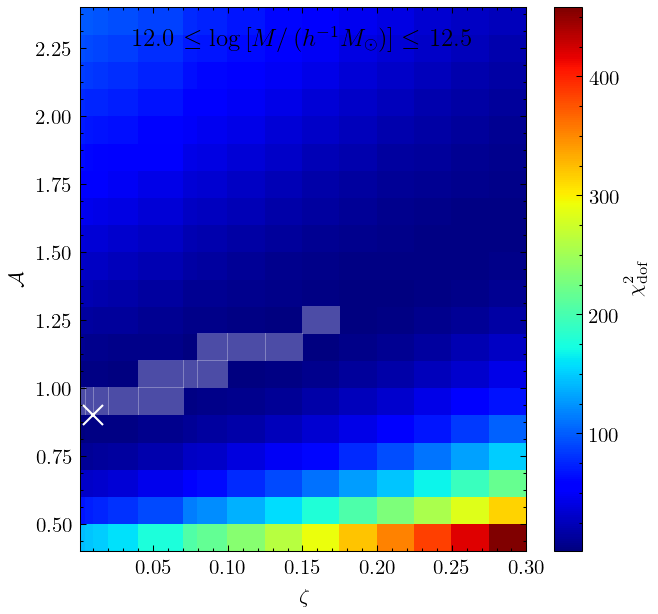

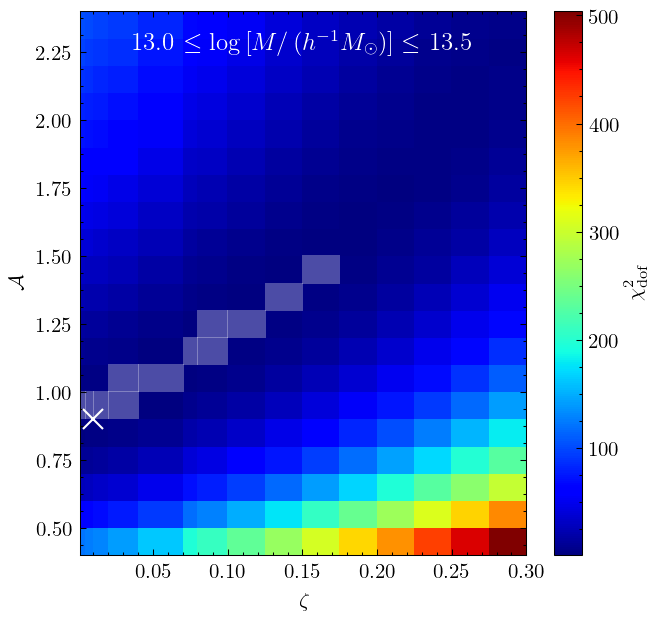

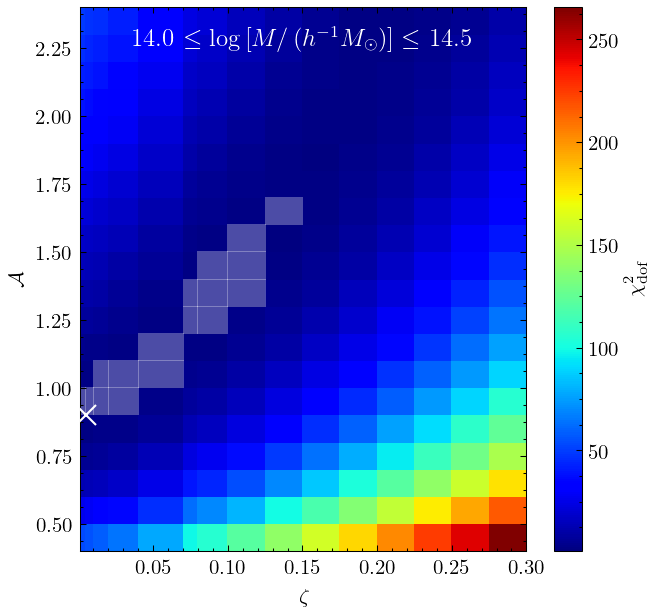

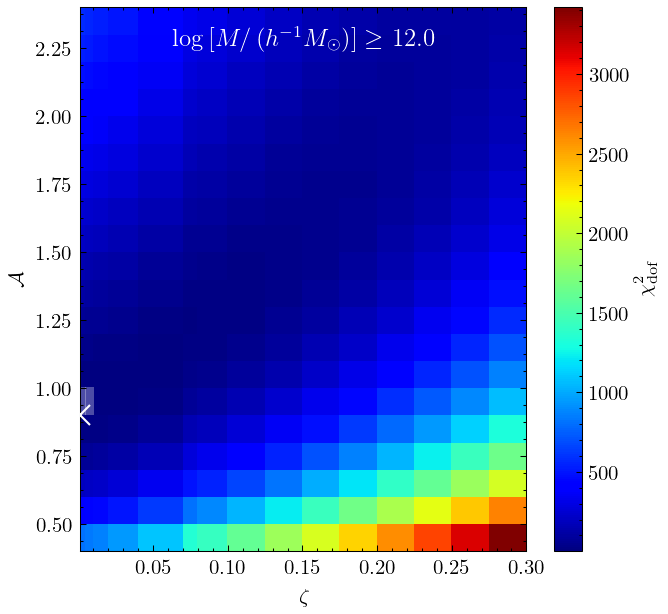

In [33]:
for Mlabel in (12, 13, 14, 'ALL'):
    ReducedChi2 = ReducedChi2dict[Mlabel]
    M1, M2 = M1dict[Mlabel], M2dict[Mlabel]
    
    plt.figure()
    plt.pcolormesh(zeta_arr, A_arr, ReducedChi2, cmap=plt.cm.jet)#, vmin=0.9240790129278156, vmax=542.9304287245984)
    cb = plt.colorbar()
    cb.set_label(r'$\chi^2_{\mathrm{dof}}$')

    Abfi, zetabfi = np.unravel_index(ReducedChi2.argmin(), ReducedChi2.shape)
    Abf, zetabf =  A_arr[Abfi], zeta_arr[zetabfi]
    print 'A', Abf, 'zeta', zetabf
    
    mask_ReducedChi2 = mask_ReducedChi2_gen(ReducedChi2)

    plt.plot(zetabf, Abf, 'x', ms=10, zorder=5, c='w')
    
    mask_ReducedChi2_marr = np.ma.masked_equal(mask_ReducedChi2, False)
    plt.pcolormesh(zeta_arr, A_arr, mask_ReducedChi2_marr, cmap='binary', alpha=.3)
    
    plt.xlabel('$\zeta$')
    plt.ylabel('$\mathcal{A}$')
    if Mlabel == 'ALL':
        plt.title(r'$\log \left[ M / \left(h^{{-1}}M_\odot \right) \right] \geq$ {}'.format(np.log10(M1)), y=0.9, color='w')
    elif Mlabel == 12:
        plt.title(r'{} $\le \log \left[ M / \left(h^{{-1}}M_\odot \right) \right] \le$ {}'.format(np.log10(M1), np.log10(M2)), y=0.9, color='k')
    else:
        plt.title(r'{} $\le \log \left[ M / \left(h^{{-1}}M_\odot \right) \right] \le$ {}'.format(np.log10(M1), np.log10(M2)), y=0.9, color='w')
    print np.log10(M1), np.log10(M2)
    print ReducedChi2.min(), ReducedChi2.max()
    print ''
    
#     plt.savefig('Paper2Figs/paramexploration_{}.pdf'.format(Mlabel))

SV 40628
12
SV 40628

SV 4797
12
SV 4797

SV 337
17
SV 337



Text(0,0.5,'$\\log \\left[ \\mathrm{d}n/\\mathrm{d} \\log(m/M) \\right]$')

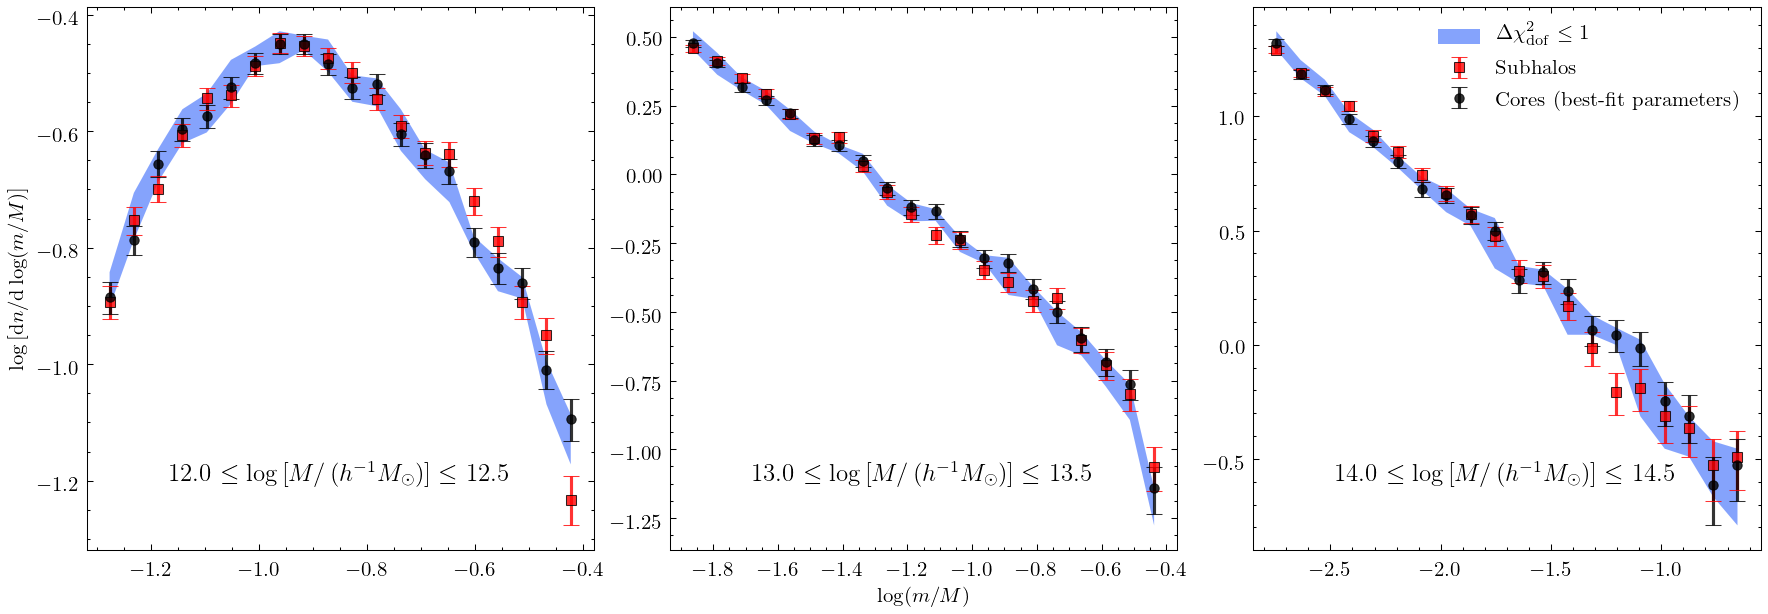

In [34]:
bins = 20
alpha = .8
label = 'SV'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=False, sharey=False, gridspec_kw={'hspace': 0, 'wspace': .15}, figsize=[4.8*3,4.8*1], dpi=150)
for Mlabel, ax in zip( (12, 13, 14), (ax1, ax2, ax3) ):
    ReducedChi2 = ReducedChi2dict[Mlabel]
    
    M1, M2 = M1dict[Mlabel], M2dict[Mlabel]
    r = rdict[Mlabel]
    
    x_sh, y_sh, yerr_sh, yerr_log_sh, nH_sh = subhalo_plot(sh, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label])
    
    Avals, zvals = np.unravel_index( np.flatnonzero(mask_ReducedChi2_gen(ReducedChi2)), ReducedChi2.shape )
    best_ys = np.zeros((len(Avals), bins), dtype=np.float64)
    print len(Avals)
    for i, (A, zeta) in enumerate(zip(A_arr[Avals], zeta_arr[zvals])):
        _, y, _, _, _ = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], A=A, zeta=zeta, verbose=False)
        best_ys[i] = y
    
    Abfi, zetabfi = np.unravel_index(ReducedChi2.argmin(), ReducedChi2.shape)
    Abf, zetabf =  A_arr[Abfi], zeta_arr[zetabfi]
    x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], A=Abf, zeta=zetabf, verbose=True)
    assert nH_cores==nH_sh
    
    ax.fill_between(x, np.amin(best_ys, axis=0), np.amax(best_ys, axis=0), label=r'$\Delta \chi^2_{\mathrm{dof}} \le 1$', alpha=0.5)
    errorbar(ax, x_sh, y_sh, yerr=yerr_log_sh, label='Subhalos', c='r', alpha=alpha, marker='s')
    errorbar(ax, x, y, yerr=yerr_log, label='Cores (best-fit parameters)', c='k', alpha=alpha )
    print ''
    ax.set_title(r'{} $\le \log \left[ M / \left(h^{{-1}}M_\odot \right) \right] \le$ {}'.format(np.log10(M1), np.log10(M2)), y=0.1, x=0.5)

ax3.legend(loc=1)
ax2.set_xlabel(r'$\log(m/M)$')
ax1.set_ylabel(r'$\log \left[ \mathrm{d}n/\mathrm{d} \log(m/M) \right]$')
    
# plt.savefig('Paper2Figs/1sigma_z0.pdf')

SV 474
SV 474
SV 474
(-2.0337499737739564, -0.4662500262260437)


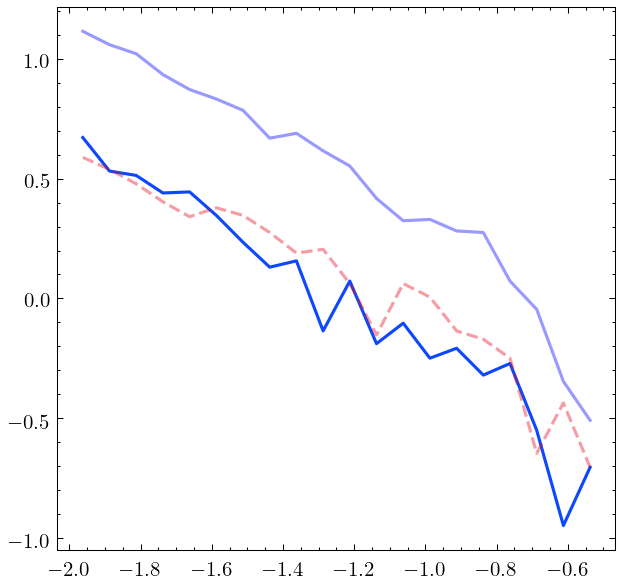

In [91]:
#testing: determine range
M1, M2 = 10**13.2, 10**13.3
r=(-2,-0.5)
bins = 20
alpha = .8
label = 'SV'

x_sh, y_sh, yerr_sh, yerr_log_sh, nH_sh, bin_mask_sh_100 = subhalo_plot(sh, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], returnMask=True)
plt.plot(x_sh, y_sh, label='subhalos 100mp')

x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], A=0.4, zeta=0.3)
plt.plot(x, y, 'b-', alpha=0.4, label='cores 1')

x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], A=0.9, zeta=0.001)
plt.plot(x, y, alpha=0.4, label='cores 100mp')

print plt.xlim()
# plt.axvline(-2.)

SV 40628
SV 40628
SV 40628
SV 40628
SV 40628
SV 40628
SV 40628
1.9446791e+12
1.8971367e+12


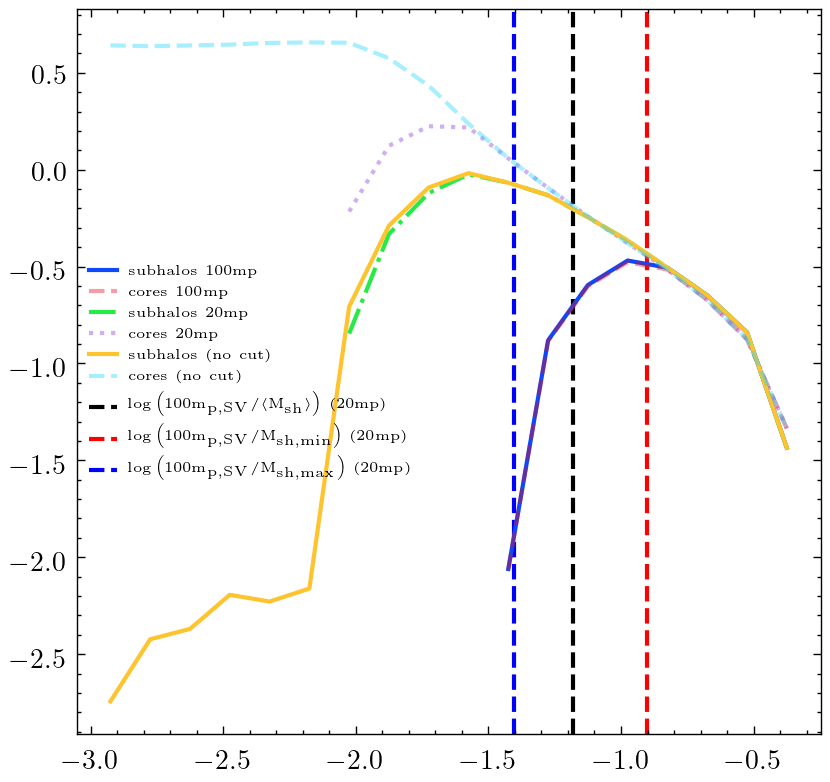

In [62]:
#testing: determine range
M1, M2 = 10**12.0, 10**12.5
r=(-3.,0)#(-0.8,-0.5)#(-0.6,-0.4)
bins = 20
alpha = .8
label = 'SV'
plt.figure(dpi=200)
x_sh, y_sh, yerr_sh, yerr_log_sh, nH_sh, bin_mask_sh_100 = subhalo_plot(sh, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], returnMask=True)
plt.plot(x_sh, y_sh, label='subhalos 100mp')

x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], A=0.4, zeta=0.3)
# plt.plot(x, y, '-', alpha=0.4, label='cores 1')

x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], A=0.9, zeta=0.001)
plt.plot(x, y, alpha=0.4, label='cores 100mp')

x_sh, y_sh, yerr_sh, yerr_log_sh, nH_sh, bin_mask_sh_20 = subhalo_plot(sh, M1, M2, label, bins, r, mlim=SUBHALOMINMASS[label], returnMask=True)
plt.plot(x_sh, y_sh, label='subhalos 20mp')

x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=SUBHALOMINMASS[label], A=0.9, zeta=0.001)
plt.plot(x, y, alpha=0.4, label='cores 20mp')

x_sh, y_sh, yerr_sh, yerr_log_sh, nH_sh = subhalo_plot(sh, M1, M2, label, bins, r, mlim=0)
plt.plot(x_sh, y_sh, label='subhalos (no cut)')

x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=0, A=0.9, zeta=0.001)
plt.plot(x, y, alpha=0.4, label='cores (no cut)')

# plt.axvline(-3.0, label='Fitting range')
# plt.axvline(-0.4)

# plt.axvline(  np.log10(100.*PARTICLEMASS[label]/np.mean(sh['M'][bin_mask_sh_100])), ymax=1., ls='--', c='r', label=r'$\log \left(\mathrm{100m_{p,'+label+ r'}/\langle M_{sh} \rangle}\right)$ (100mp)' )
plt.axvline(  np.log10(100*PARTICLEMASS[label]/np.mean(sh['M'][bin_mask_sh_20])), ymax=1., c='k', ls='--', label=r'$\log \left(\mathrm{100m_{p,'+label+ r'}/\langle M_{sh} \rangle}\right)$ (20mp)', zorder=0 )

plt.axvline(  np.log10(100*PARTICLEMASS[label]/np.min(sh['M'][bin_mask_sh_20])), ymax=1., c='r', ls='--', label=r'$\log \left(\mathrm{100m_{p,'+label+ r'}/ M_{sh, min} }\right)$ (20mp)', zorder=0 )
plt.axvline(  np.log10(100*PARTICLEMASS[label]/np.max(sh['M'][bin_mask_sh_20])), ymax=1., c='b', ls='--', label=r'$\log \left(\mathrm{100m_{p,'+label+ r'}/M_{sh, max} }\right)$ (20mp)', zorder=0)

# plt.axvline(  np.log10(20.*PARTICLEMASS[label]/np.mean(sh['M'][bin_mask_sh_100])), ymax=1., ls='--', c='r', label=r'$\log \left(\mathrm{20m_{p,'+label+ r'}/\langle M_{sh} \rangle}\right)$ (100mp)' )
# plt.axvline(  np.log10(20.*PARTICLEMASS[label]/np.mean(sh['M'][bin_mask_sh_20])), ymax=1., ls='--', label=r'$\log \left(\mathrm{20m_{p,'+label+ r'}/\langle M_{sh} \rangle}\right)$ (20mp)',zorder=0)

print np.format_float_scientific( np.mean(sh['M'][bin_mask_sh_100]) )
print np.format_float_scientific( np.mean(sh['M'][bin_mask_sh_20]) )
        
plt.legend(fontsize=5)
# plt.axvline(-0.9)
# plt.axvline(-1.2)



## z=1 HM fitting

In [65]:
bins = 20
alpha = .8
label = 'HM'

cc = cc_HM1
sh = sh_HM1
centrals_mask = centrals_mask_HM1

rdict = {12:(-2.2,-0.6), 13:(-3.0,-0.6), 14:(-4.0,-0.6), 'ALL':(-2.3,-0.6)} #z=0 HM fitting

M1dict={12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}
M2dict={12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc['M'].max()}
ReducedChi2dict = {}

for Mlabel in (12, 13, 14, 'ALL'):
    r = rdict[Mlabel]
    M1, M2 = M1dict[Mlabel], M2dict[Mlabel]
    _, _, _, _, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label])
    x_sh, y_sh, yerr_sh, yerr_log_sh, nH_sh = subhalo_plot(sh, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label])
    assert nH_cores == nH_sh
    
    Chi2 = np.empty((len(A_arr), len(zeta_arr)))
    for i, A in enumerate(A_arr):
        for j, zeta in enumerate(zeta_arr):
            x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], A=A, zeta=zeta, verbose=False)
            Chi2[i,j] = np.sum( (10**y_sh-10**y)**2/(yerr**2 + yerr_sh**2) )
    ReducedChi2 = np.true_divide(Chi2 , bins-2)
    assert np.isfinite(ReducedChi2).all()
    ReducedChi2dict[Mlabel] = ReducedChi2
    print ''

HM 33020
HM 33020

HM 2368
HM 2368

HM 21
HM 21

HM 45394
HM 45394



A 1.7 zeta 0.275
12.0 12.5
6.348674000180215 4807.801478138268

A 2.2 zeta 0.3
13.0 13.5
6.8980966639947505 1823.6431314299984

A 0.9 zeta 0.07
14.0 14.5
0.9877083910909339 172.27106545579355

A 1.9 zeta 0.3
12.0 14.577735
12.882110053305972 8274.739556584587



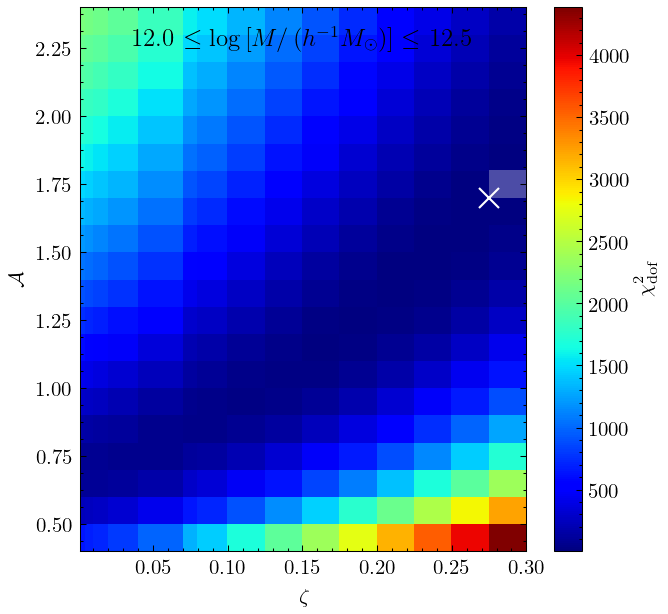

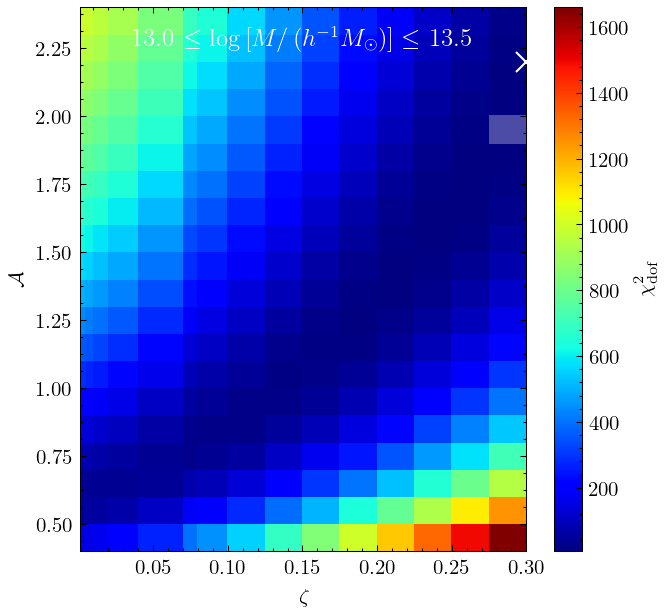

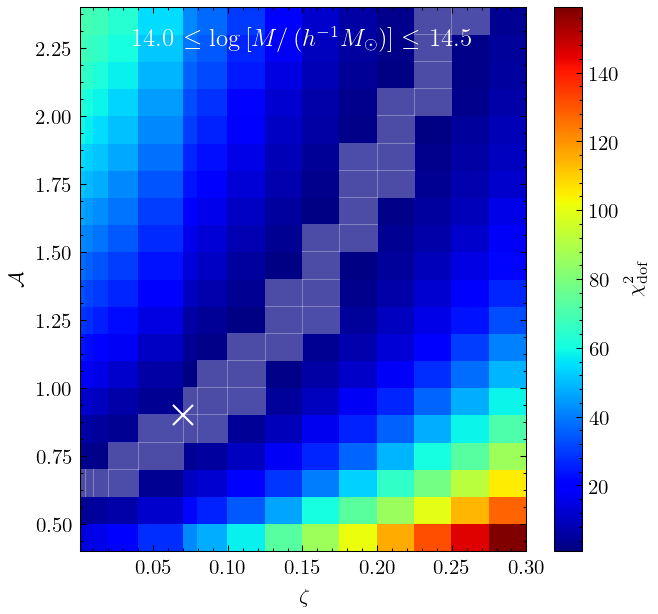

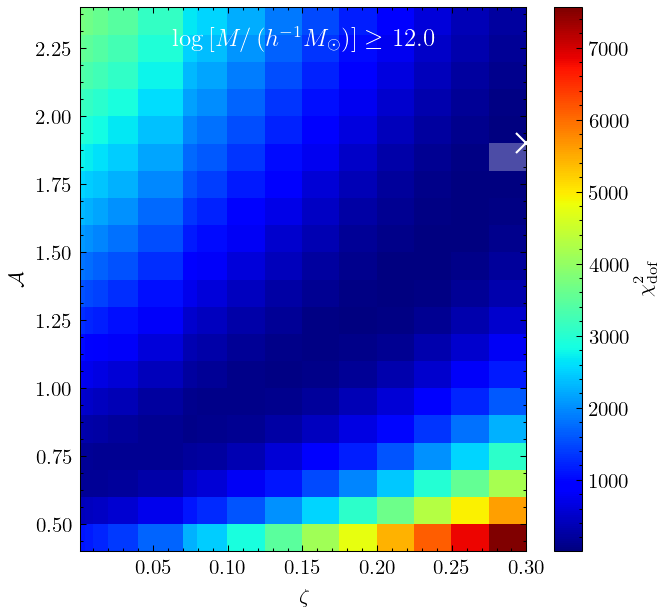

In [66]:
for Mlabel in (12, 13, 14, 'ALL'):
    ReducedChi2 = ReducedChi2dict[Mlabel]
    M1, M2 = M1dict[Mlabel], M2dict[Mlabel]
    
    plt.figure()
    plt.pcolormesh(zeta_arr, A_arr, ReducedChi2, cmap=plt.cm.jet)#, vmin=0.9240790129278156, vmax=542.9304287245984)
    cb = plt.colorbar()
    cb.set_label(r'$\chi^2_{\mathrm{dof}}$')

    Abfi, zetabfi = np.unravel_index(ReducedChi2.argmin(), ReducedChi2.shape)
    Abf, zetabf =  A_arr[Abfi], zeta_arr[zetabfi]
    print 'A', Abf, 'zeta', zetabf
    
    mask_ReducedChi2 = mask_ReducedChi2_gen(ReducedChi2)

    plt.plot(zetabf, Abf, 'x', ms=10, zorder=5, c='w')
    
    mask_ReducedChi2_marr = np.ma.masked_equal(mask_ReducedChi2, False)
    plt.pcolormesh(zeta_arr, A_arr, mask_ReducedChi2_marr, cmap='binary', alpha=.3)
    
    plt.xlabel('$\zeta$')
    plt.ylabel('$\mathcal{A}$')
    if Mlabel == 'ALL':
        plt.title(r'$\log \left[ M / \left(h^{{-1}}M_\odot \right) \right] \geq$ {}'.format(np.log10(M1)), y=0.9, color='w')
    elif Mlabel == 12:
        plt.title(r'{} $\le \log \left[ M / \left(h^{{-1}}M_\odot \right) \right] \le$ {}'.format(np.log10(M1), np.log10(M2)), y=0.9, color='k')
    else:
        plt.title(r'{} $\le \log \left[ M / \left(h^{{-1}}M_\odot \right) \right] \le$ {}'.format(np.log10(M1), np.log10(M2)), y=0.9, color='w')
    print np.log10(M1), np.log10(M2)
    print ReducedChi2.min(), ReducedChi2.max()
    print ''
    
#     plt.savefig('Paper2Figs/paramexploration_{}.pdf'.format(Mlabel))

A 0.8 zeta 0.01
12.0 12.5
2.1918013196558483 6749.011395611575

A 0.8 zeta 0.01
13.0 13.5
5.008949183657138 4581.563918089906

A 0.8 zeta 0.001
14.0 14.5
8.897495929082156 3529.1384373394767

A 0.8 zeta 0.01
12.0 15.193961
3.8880778082855283 12830.820356818338



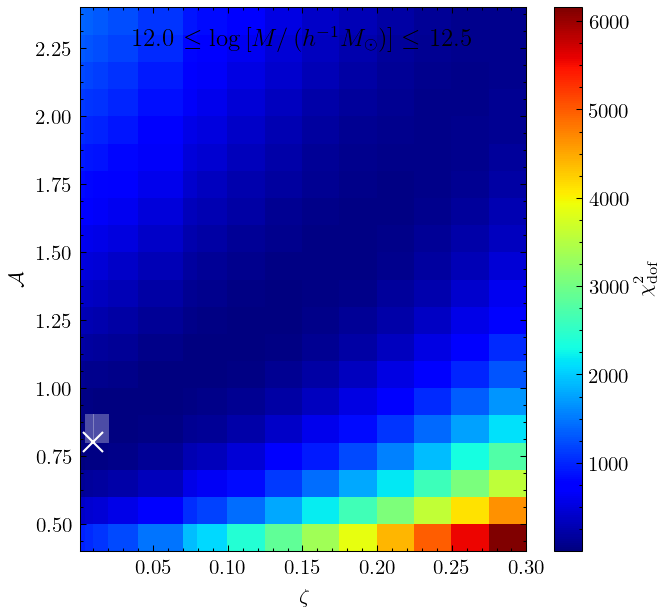

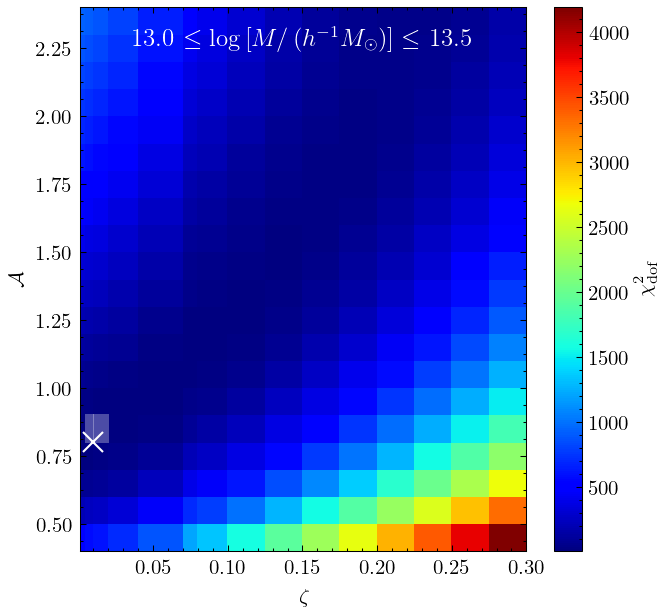

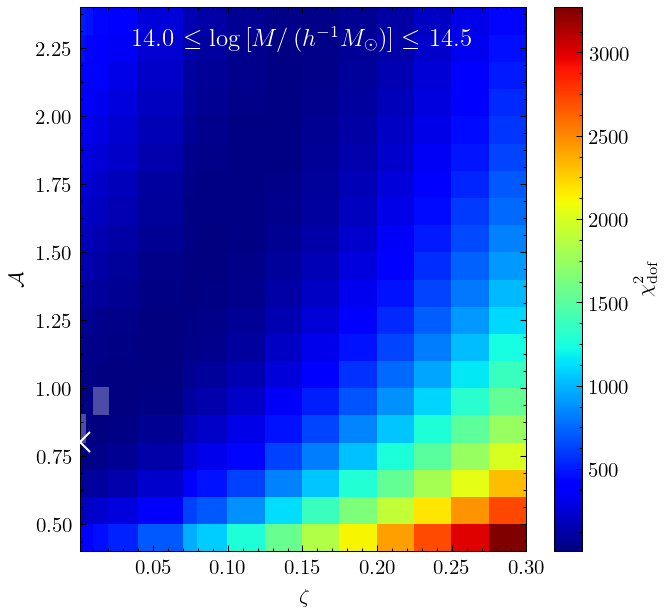

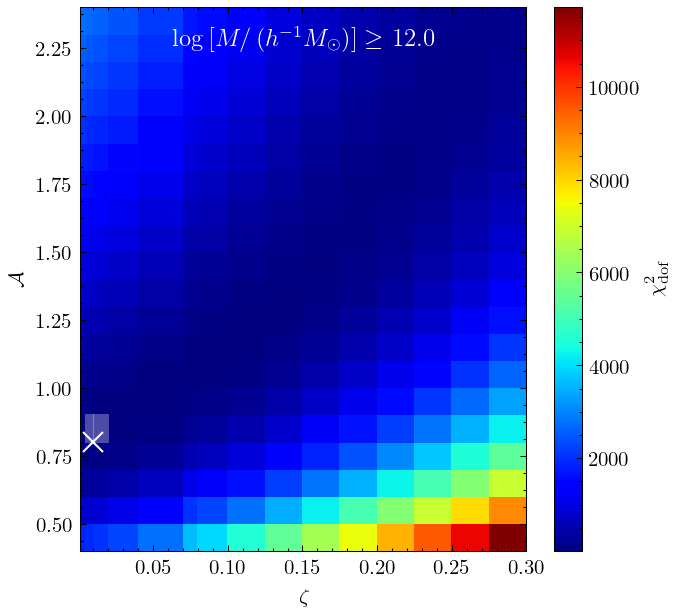

In [64]:
for Mlabel in (12, 13, 14, 'ALL'):
    ReducedChi2 = ReducedChi2dict[Mlabel]
    M1, M2 = M1dict[Mlabel], M2dict[Mlabel]
    
    plt.figure()
    plt.pcolormesh(zeta_arr, A_arr, ReducedChi2, cmap=plt.cm.jet)#, vmin=0.9240790129278156, vmax=542.9304287245984)
    cb = plt.colorbar()
    cb.set_label(r'$\chi^2_{\mathrm{dof}}$')

    Abfi, zetabfi = np.unravel_index(ReducedChi2.argmin(), ReducedChi2.shape)
    Abf, zetabf =  A_arr[Abfi], zeta_arr[zetabfi]
    print 'A', Abf, 'zeta', zetabf
    
    mask_ReducedChi2 = mask_ReducedChi2_gen(ReducedChi2)

    plt.plot(zetabf, Abf, 'x', ms=10, zorder=5, c='w')
    
    mask_ReducedChi2_marr = np.ma.masked_equal(mask_ReducedChi2, False)
    plt.pcolormesh(zeta_arr, A_arr, mask_ReducedChi2_marr, cmap='binary', alpha=.3)
    
    plt.xlabel('$\zeta$')
    plt.ylabel('$\mathcal{A}$')
    if Mlabel == 'ALL':
        plt.title(r'$\log \left[ M / \left(h^{{-1}}M_\odot \right) \right] \geq$ {}'.format(np.log10(M1)), y=0.9, color='w')
    elif Mlabel == 12:
        plt.title(r'{} $\le \log \left[ M / \left(h^{{-1}}M_\odot \right) \right] \le$ {}'.format(np.log10(M1), np.log10(M2)), y=0.9, color='k')
    else:
        plt.title(r'{} $\le \log \left[ M / \left(h^{{-1}}M_\odot \right) \right] \le$ {}'.format(np.log10(M1), np.log10(M2)), y=0.9, color='w')
    print np.log10(M1), np.log10(M2)
    print ReducedChi2.min(), ReducedChi2.max()
    print ''
    
#     plt.savefig('Paper2Figs/paramexploration_{}.pdf'.format(Mlabel))

HM 45394
HM 45394
HM 45394
HM 45394
(-2.3382499277591706, -0.5617500483989716)


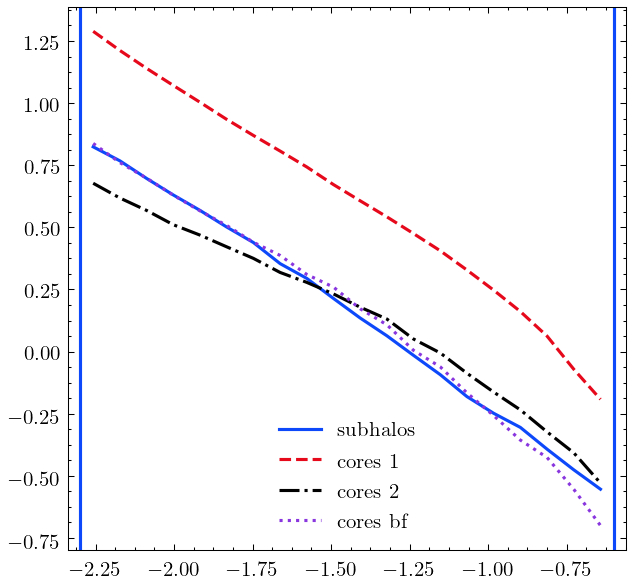

In [75]:
#testing: determine range
M1, M2 = 10**12.0,cc['M'].max()#10**14.5
r=rdict['ALL']
bins = 20
label = 'HM'

x_sh, y_sh, yerr_sh, yerr_log_sh, nH_sh, bin_mask_sh_100 = subhalo_plot(sh, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], returnMask=True)
plt.plot(x_sh, y_sh, label='subhalos')

x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], A=0.4, zeta=0.3)
plt.plot(x, y, label='cores 1')

x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], A=0.8, zeta=0.01)
plt.plot(x, y, 'k', label='cores 2')

x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], A=1.9, zeta=0.3)
plt.plot(x, y, label='cores bf')

plt.legend()
print plt.xlim()
plt.axvline(-2.3)
plt.axvline(-0.6)

# Subhalo:Core matching

In [20]:
def subhalo_core_match(M1, M2, cc, centrals_mask, sh, step, mlim=OBJECTMASSCUT['SV'], SHMLM=SHMLM_SV, A=0.9, zeta=0.001, s1=False, mostMassiveCore=False):
    sh['rvir'] = SHMLM.getRvir(sh['subhalo_mass'], SHMLM.step2z[step])
    subhalo_mean_x = periodic_bcs(sh['subhalo_mean_x'], sh['X'], SHMLM.BOXSIZE)
    subhalo_mean_y = periodic_bcs(sh['subhalo_mean_y'], sh['Y'], SHMLM.BOXSIZE)
    subhalo_mean_z = periodic_bcs(sh['subhalo_mean_z'], sh['Z'], SHMLM.BOXSIZE)

    cores_x = periodic_bcs(cc['x'], cc['X'], SHMLM.BOXSIZE)
    cores_y = periodic_bcs(cc['y'], cc['Y'], SHMLM.BOXSIZE)
    cores_z = periodic_bcs(cc['z'], cc['Z'], SHMLM.BOXSIZE)

    bin_mask_sh = (sh['subhalo_tag']!=0)&(M1 <= sh['M'])&(sh['M'] <= M2)&(sh['subhalo_mass']>mlim)
    nH_sh = len(np.unique( sh['fof_halo_tag'][(M1 <= sh['M'])&(sh['M'] <= M2)] ))

    sh_arr = np.vstack((subhalo_mean_x[bin_mask_sh], subhalo_mean_y[bin_mask_sh], subhalo_mean_z[bin_mask_sh])).T
    distance_upper_bound = 2. * sh['rvir'][bin_mask_sh]

    bin_mask_cores = (~centrals_mask)&(M1 <= cc['M'])&(cc['M'] <= M2)&(cc[m_evolved_col(A, zeta)]>mlim)
    if s1:
        bin_mask_cores = bin_mask_cores&(cc['host_core']==cc['CORETAG'])
    fht_fof = (cc['fof_halo_tag']<0)*np.bitwise_and(cc['fof_halo_tag']*-1, 0xffffffffffff) + (cc['fof_halo_tag']>=0)*cc['fof_halo_tag']
    nH_cores = len(np.unique( fht_fof[centrals_mask&(M1 <= cc['M'])&(cc['M'] <= M2)] ))
    assert nH_cores == nH_sh

    cores_tree = spatial.cKDTree( np.vstack((cores_x[bin_mask_cores], cores_y[bin_mask_cores], cores_z[bin_mask_cores])).T )
    
    if mostMassiveCore:
        iarr, carr = [], []
        for i in range(len(distance_upper_bound)):
            qres = cores_tree.query_ball_point(sh_arr[i], r=distance_upper_bound[i])
            if len(qres)>0:
                idxmax = qres[ np.argmax(cc[m_evolved_col(A, zeta)][bin_mask_cores][qres]) ]
                iarr.append(i)
                carr.append(idxmax)
        percentexists = len(iarr)/np.sum(bin_mask_sh)*100
        print '{}% of masked subhalos have at least 1 core within their search radius.'.format(percentexists)
        matched_mask_cores = np.flatnonzero(bin_mask_cores)[carr]
        matched_mask_sh = np.flatnonzero(bin_mask_sh)[iarr]
    else:
        dist, idx = [], []
        for i in range(len(distance_upper_bound)):
            dv, iv = cores_tree.query(sh_arr[i], k=2, distance_upper_bound=distance_upper_bound[i])
            dist.append(dv)
            idx.append(iv)
        dist = np.array(dist)
        idx = np.array(idx)

        f1, f2 = (dist != np.inf).T
        fmask = f1^f2

        percentmatch = np.sum(fmask)/np.sum(bin_mask_sh)*100
        f1i = f1[np.invert(fmask)]
        percentmany = np.sum(f1i)/len(f1i)*100
        percentnone = np.sum(np.invert(f1i))/len(f1i)*100
        print '{}% of masked subhalos have 1:1 core match. Of the unmatched subhalos, {}% have mutliple cores and {}% have no core.'.format(percentmatch, percentmany, percentnone)

        matched_mask_cores = np.flatnonzero(bin_mask_cores)[idx[:,0][fmask]]
        matched_mask_sh = np.flatnonzero(bin_mask_sh)[fmask]
    
    matched_m_cores = cc[m_evolved_col(A, zeta)][matched_mask_cores]
    matched_M_cores = cc['M'][matched_mask_cores]
    matched_ifhm_cores = cc['infall_fof_halo_mass'][matched_mask_cores]
    
    matched_m_sh = sh['subhalo_mass'][matched_mask_sh]
    matched_M_sh = sh['M'][matched_mask_sh]
    
#     assert np.array_equal(matched_M_cores, matched_M_sh)
    
    return (matched_m_cores, matched_M_cores, nH_cores, matched_ifhm_cores), (matched_m_sh, matched_M_sh, nH_sh), matched_mask_cores, matched_mask_sh

In [21]:
for logM1 in (12, 13, 14):
    M1, M2 = 10**logM1, 10**(logM1+0.5)
    _, _, matched_mask_cores, matched_mask_sh = subhalo_core_match(M1, M2, cc_SV0, centrals_mask_SV0, sh_SV0, 499)
    _, _, matched_mask_cores_s1, matched_mask_sh_s1 = subhalo_core_match(M1, M2, cc_SV0, centrals_mask_SV0, sh_SV0, 499, s1=True)
    _, _, matched_mask_cores_mmc, matched_mask_sh_mmc = subhalo_core_match(M1, M2, cc_SV0, centrals_mask_SV0, sh_SV0, 499, mostMassiveCore=True)
    
    assert len(matched_mask_sh)==len(np.unique(matched_mask_sh))
    assert len(matched_mask_sh_s1)==len(np.unique(matched_mask_sh_s1))
    assert len(matched_mask_sh_mmc)==len(np.unique(matched_mask_sh_mmc))
    
    print 'ALL CORES UNIQUE', len(np.unique(matched_mask_cores))/len(matched_mask_cores)*100
    print 'S1  CORES UNIQUE', len(np.unique(matched_mask_cores_s1))/len(matched_mask_cores_s1)*100
    print 'MMC  CORES UNIQUE', len(np.unique(matched_mask_cores_mmc))/len(matched_mask_cores_mmc)*100
    
    print '% OF SUBHALOS (ALL CORES) FOUND IN SUBHALOS (S1 CORES)', len(np.intersect1d(matched_mask_sh, matched_mask_sh_s1))/len(matched_mask_sh)*100
    
#     assert np.isin(matched_mask_cores, matched_mask_cores_s1).all()
    
    print ''

68.7189335743% of masked subhalos have 1:1 core match. Of the unmatched subhalos, 17.0097508126% have mutliple cores and 82.9902491874% have no core.
69.3741527338% of masked subhalos have 1:1 core match. Of the unmatched subhalos, 15.0129103652% have mutliple cores and 84.9870896348% have no core.
74.0397650249% of masked subhalos have at least 1 core within their search radius.
ALL CORES UNIQUE 97.583429229
S1  CORES UNIQUE 97.2154372252
MMC  CORES UNIQUE 95.5599633811
% OF SUBHALOS (ALL CORES) FOUND IN SUBHALOS (S1 CORES) 99.9013644583

52.9609929078% of masked subhalos have 1:1 core match. Of the unmatched subhalos, 56.6339992461% have mutliple cores and 43.3660007539% have no core.
55.3723404255% of masked subhalos have 1:1 core match. Of the unmatched subhalos, 50.4966229638% have mutliple cores and 49.5033770362% have no core.
79.6010638298% of masked subhalos have at least 1 core within their search radius.
ALL CORES UNIQUE 94.8610646133
S1  CORES UNIQUE 92.8113992955
MMC  CORE

74.0397650249% of masked subhalos have at least 1 core within their search radius.
79.6010638298% of masked subhalos have at least 1 core within their search radius.
82.1674732365% of masked subhalos have at least 1 core within their search radius.


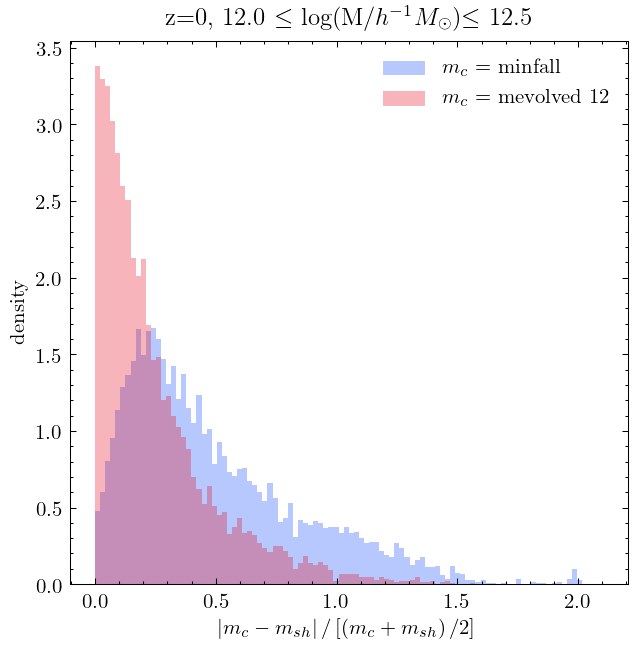

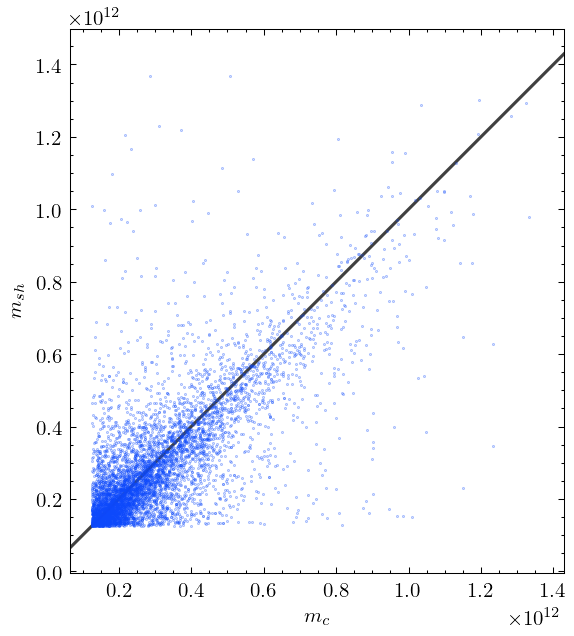

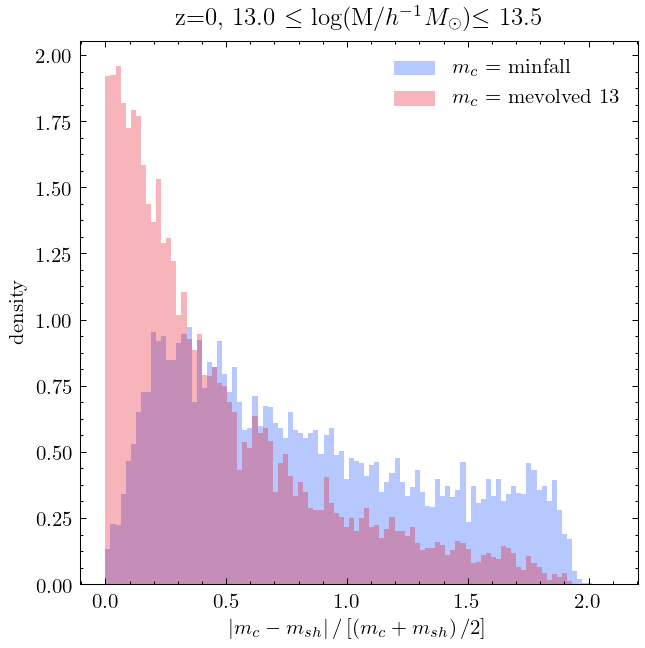

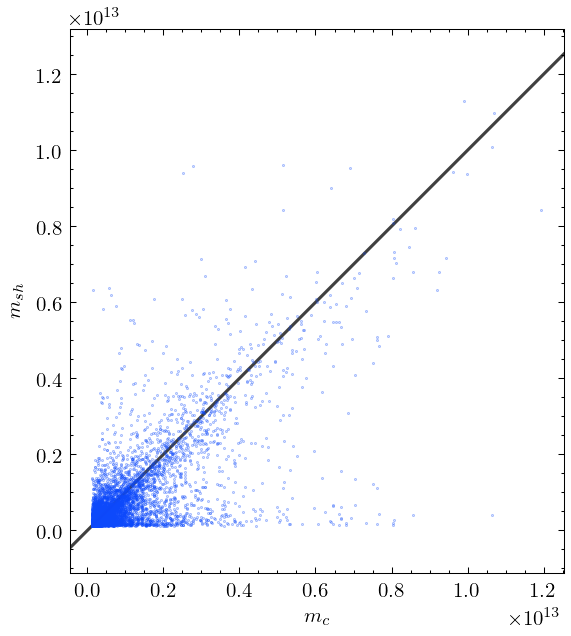

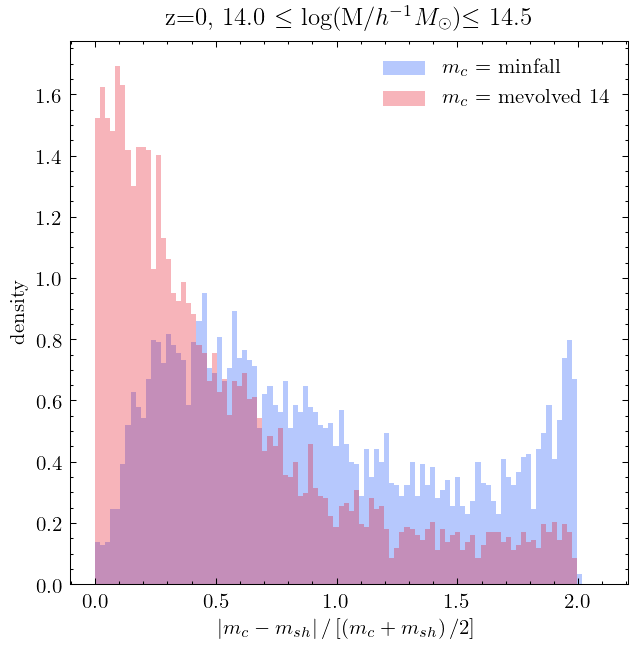

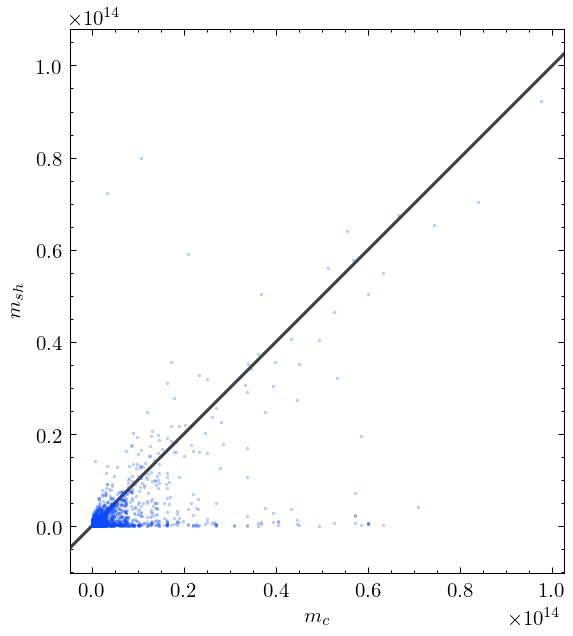

In [22]:
for logM1, alpha in zip( (12, 13, 14), (.3, .3, .3) ):
    M1, M2 = 10**logM1, 10**(logM1+0.5)
    (matched_m_cores, matched_M_cores, nH_cores, matched_ifhm_cores), (matched_m_sh, matched_M_sh, nH_sh), _, _ = subhalo_core_match(M1, M2, cc_SV0, centrals_mask_SV0, sh_SV0, 499, mostMassiveCore=True)
    #(matched_m_cores, matched_M_cores, nH_cores, matched_ifhm_cores), (matched_m_sh, matched_M_sh, nH_sh), _, _ = subhalo_core_match(M1, M2, cc_HM0, centrals_mask_HM0, sh_HM0, 499, mlim=OBJECTMASSCUT['HM'], SHMLM=SHMLM_HM, mostMassiveCore=True)
    
    bins = 100
    r = (0, 2.1)

    plt.figure()
    plt.hist(reldif(matched_ifhm_cores, matched_m_sh), range=r, bins=bins, alpha=alpha, label='$m_c=$ minfall', density=True);
    plt.hist(reldif(matched_m_cores, matched_m_sh), range=r, bins=bins, alpha=alpha, label='$m_c=$ mevolved '+str(logM1), density=True);
    plt.title( 'z=0, {} $\leq$ log(M/$h^{{-1}}M_\odot$)$\leq$ {}'.format(np.log10(M1),np.log10(M2)) )
    plt.xlabel(r'$\left|m_c-m_{sh}\right|/\left[\left(m_c+m_{sh}\right)/2\right]$')
    plt.ylabel('density')
    plt.legend()
    
    fig, ax = plt.subplots(1)
    ax.scatter(matched_m_cores, matched_m_sh, s=.1, alpha=0.5)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_xlabel('$m_c$')
    ax.set_ylabel('$m_{sh}$')

59.491787496% of masked subhalos have 1:1 core match. Of the unmatched subhalos, 64.5516744689% have mutliple cores and 35.4483255311% have no core.
59.2946972644% of masked subhalos have 1:1 core match. Of the unmatched subhalos, 20.4930564403% have mutliple cores and 79.5069435597% have no core.




/home/isultan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in subtract
/home/isultan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


43.5177329034% of masked subhalos have 1:1 core match. Of the unmatched subhalos, 80.8772720445% have mutliple cores and 19.1227279555% have no core.
41.4483381675% of masked subhalos have 1:1 core match. Of the unmatched subhalos, 27.0505116128% have mutliple cores and 72.9494883872% have no core.




/home/isultan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


33.8504469564% of masked subhalos have 1:1 core match. Of the unmatched subhalos, 85.4068354068% have mutliple cores and 14.5931645932% have no core.
36.2505757715% of masked subhalos have 1:1 core match. Of the unmatched subhalos, 24.5664739884% have mutliple cores and 75.4335260116% have no core.




Text(0,0.5,'ratio')

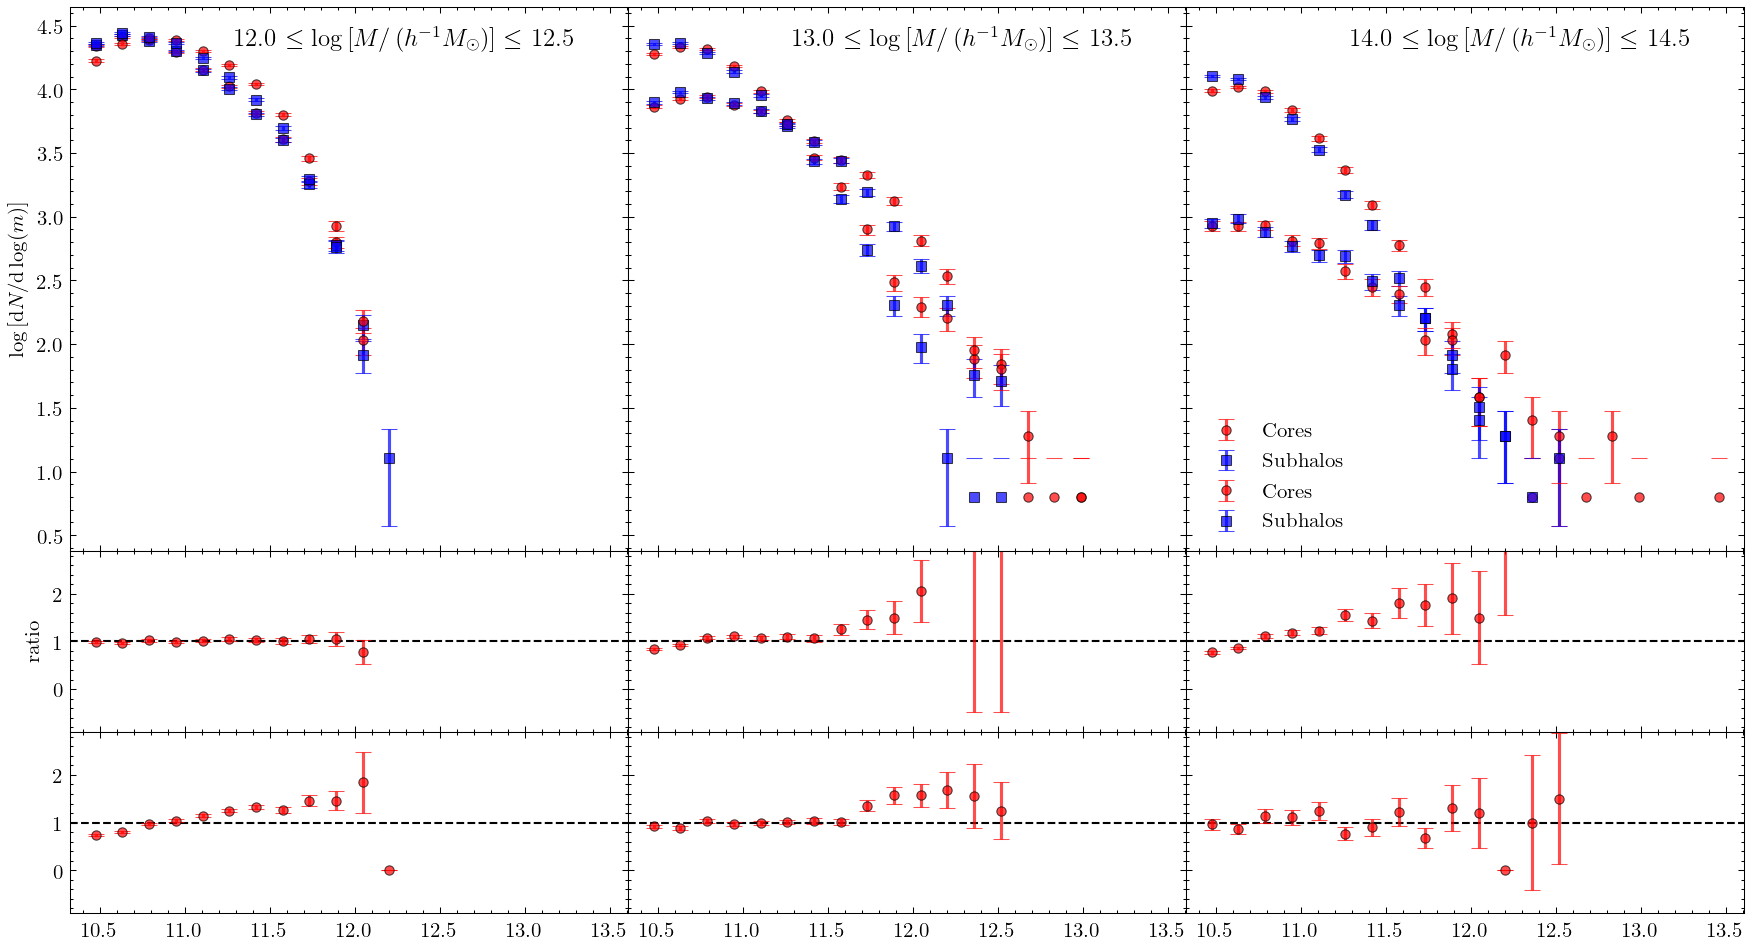

In [62]:
# r = (-4,-0.5)
r = (np.log10(SUBHALOMINMASS['SV']),13.539756)
bins = 20
alpha = .7

fig, ((ax1, ax2, ax3),(ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex='all', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0, 'height_ratios': [3, 1, 1]}, figsize=[4.8*3,4.8*5/3], dpi=150)
for logM1, ax, axr1, axr2 in zip((12, 13, 14), (ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)):
    ax.set_title(r'{} $\le \log \left[ M / \left(h^{{-1}}M_\odot \right) \right] \le$ {}'.format(logM1+0.0, logM1+0.5), y=0.9, x=0.6)
    M1, M2 = 10**logM1, 10**(logM1+0.5)
    label = str(logM1)

    for ((matched_m_cores, matched_M_cores, nH_cores, matched_ifhm_cores), (matched_m_sh, matched_M_sh, nH_sh)), axr in zip( (subhalo_core_match(M1, M2, cc_SV0, centrals_mask_SV0, sh_SV0, 499), subhalo_core_match(M1, M2, cc_SV1, centrals_mask_SV1, sh_SV1, 247)), (axr1, axr2) ):
        parr = matched_m_cores
        parr_sh = matched_m_sh

        x, y, yerr, yerr_log = hist(np.log10(parr), bins=bins, normed=True, plotFlag=False, range=r, normBinsize=True, normLogCnts=True, retEbars=True)
        errorbar(ax, x, y, yerr=yerr_log, label='Cores', marker='o', alpha=alpha, c='r')

        x_sh, y_sh, yerr_sh, yerr_log_sh = hist(np.log10(parr_sh), bins=bins, normed=True, plotFlag=False, range=r, normBinsize=True, normLogCnts=True, retEbars=True)
        errorbar(ax, x_sh, y_sh, yerr=yerr_log_sh, label='Subhalos', marker='s', alpha=alpha, c='b')

        print ''
        errorbar(axr, x, 10**(y-y_sh), yerr=nratioerr(10**y, yerr, 10**y_sh, yerr_sh), marker='o', c='r', alpha=alpha)
    
        axr.axhline(1, c='k',ls='--', lw=1, zorder=-1)
        #print axr.get_ylim()
        axr.set_ylim(-.9,2.9)
ax3.legend(loc=3)
ax5.set_xlabel(r'$\log(m)$')
ax1.set_ylabel(r'$\log \left[ \mathrm{d}N/\mathrm{d} \log(m) \right]$')
ax4.set_ylabel(r'ratio')
# plt.savefig('Paper2Figs/spatialmatching_SV_z0.pdf')